
=== CORRELATION MATRIX ===

             Tata_Power  Adani_Power  Adani_Green  TATA POWER     NHPC  \
Tata_Power       1.0000       0.9317       0.4955       0.9202  0.9756   
Adani_Power      0.9317       1.0000       0.6836       0.9581  0.9466   
Adani_Green      0.4955       0.6836       1.0000       0.7396  0.5379   
TATA POWER       0.9202       0.9581       0.7396       1.0000  0.9319   
NHPC             0.9756       0.9466       0.5379       0.9319  1.0000   
GAIL             0.9237       0.8249       0.3715       0.8322  0.9085   
Power_Grid       0.9569       0.9563       0.6154       0.9659  0.9677   
JSW_Energy       0.9177       0.9477       0.6929       0.9810  0.9194   
SJVN             0.9704       0.9047       0.4559       0.8793  0.9759   
Coal_India       0.6916       0.5231       0.3159       0.4909  0.6187   
CRUDE BRENT      0.4436       0.5699       0.6589       0.6424  0.4476   
USDINR           0.6628       0.8144       0.6716       0.7957  0.7123   
Crude_INR

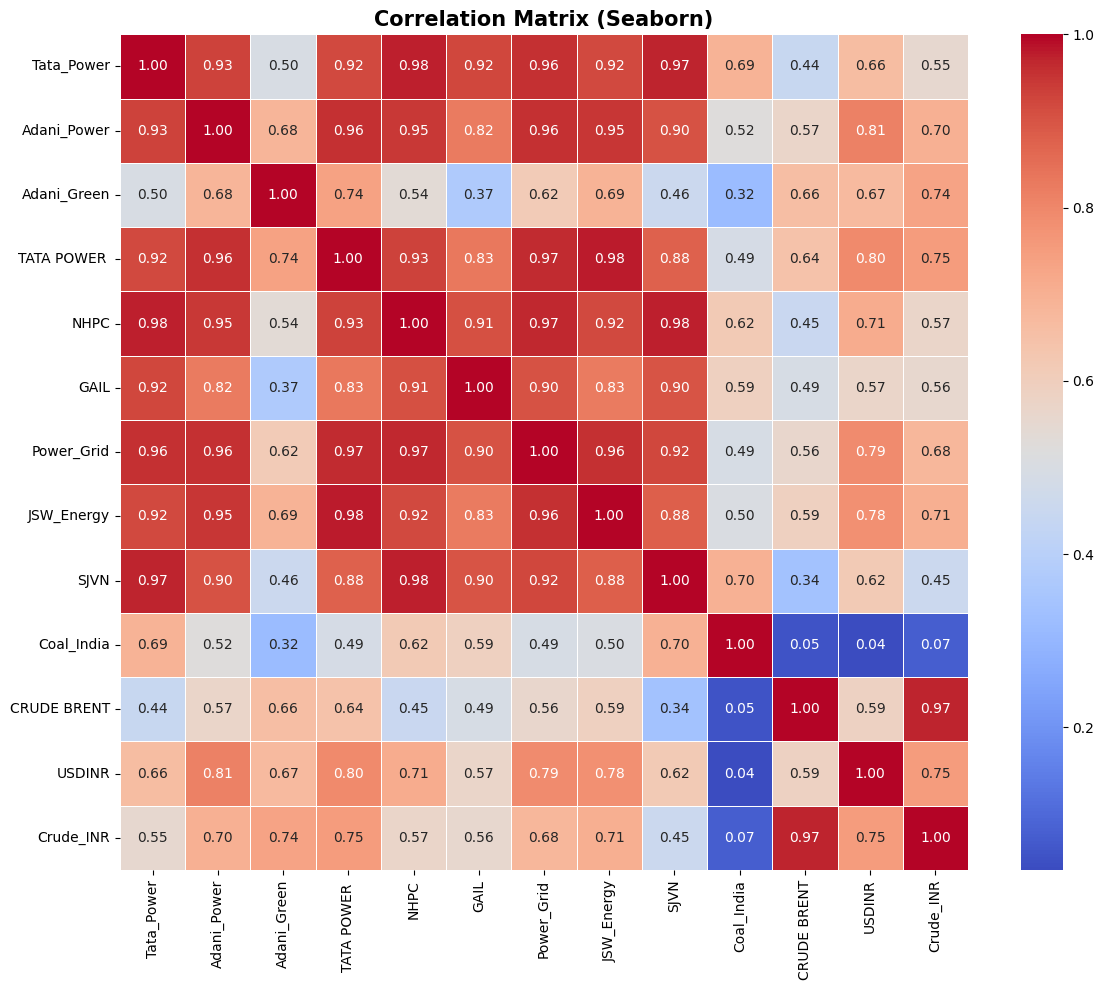

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file = "/content/Crude_Oil_Indian_Energy_Stocks_10Years.xlsx"
df = pd.read_excel(file, index_col=0)

# Compute correlation matrix
corr = df.corr()

# Print matrix
print("\n=== CORRELATION MATRIX ===\n")
print(corr.round(4))

# Seaborn Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=0.5, linecolor="white")
plt.title("Correlation Matrix (Seaborn)", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()


### The correlation matrix shows that all energy-sector companies are extremely highly correlated with each other, with values mostly above 0.90. Such strong co-movement indicates that the stocks share common risk factors and react similarly to crude oil, policy changes, and market conditions. To capture the sector’s true collective behaviour, I created an equal-weighted Energy Index. This index represents the overall movement of the energy sector without bias toward any single company, allowing for cleaner, more stable, and more interpretable hypothesis testing against crude oil prices.

In [7]:
import pandas as pd
import numpy as np

print("Reading Excel file...\n")

# ----------------------------
# 1. Read the Excel file
# ----------------------------
input_file = "Crude_Oil_Indian_Energy_Stocks_10Years.xlsx"
df = pd.read_excel(input_file, index_col=0)

print(f"Loaded data shape: {df.shape}")
print(f"Columns: {list(df.columns)}\n")

# ----------------------------
# 2. Identify stock columns (exclude Crude_INR)
# ----------------------------
stock_columns = [col for col in df.columns if col != "Crude_INR"]
print(f"Stock columns ({len(stock_columns)}): {stock_columns}\n")

# ----------------------------
# 3. Calculate equal weight index
# ----------------------------
# Simple average of all stock prices (equal weight)
df["Energy_Index"] = df[stock_columns].mean(axis=1)

print("Sample stock prices (first 5 rows):")
print(df[stock_columns].head())
print("\n")

# ----------------------------
# 4. Display results
# ----------------------------
print(f"Energy Index created successfully!")
print(f"Index range: {df['Energy_Index'].min():.2f} to {df['Energy_Index'].max():.2f}")
print(f"Latest value: {df['Energy_Index'].iloc[-1]:.2f}\n")

print("Sample data with new index (first 5 rows):")
print(df[["Crude_INR", "Energy_Index"] + stock_columns[:3]].head())
print("\n")

# ----------------------------
# 5. Calculate correlation with Crude Oil
# ----------------------------
correlation = df["Crude_INR"].corr(df["Energy_Index"])
print(f"Correlation between Crude Oil & Energy Index: {correlation:.4f}\n")

# ----------------------------
# 6. Statistics
# ----------------------------
print("Statistics for new Energy Index:")
print(df["Energy_Index"].describe().round(2))
print("\n")

# ----------------------------
# 7. Export to Excel with new column
# ----------------------------
output_file = "Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx"

with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    # Main data with index
    df.to_excel(writer, sheet_name="Daily_Data_With_Index")

    # Individual stock prices (for reference)
    df[stock_columns].to_excel(writer, sheet_name="Individual_Stocks")

    # Summary statistics
    summary_df = pd.DataFrame({
        "Crude_INR": df["Crude_INR"].describe(),
        "Energy_Index": df["Energy_Index"].describe()
    })
    summary_df.to_excel(writer, sheet_name="Summary_Stats")

    # Correlation matrix
    corr_cols = ["Crude_INR", "Energy_Index"] + stock_columns
    corr_matrix = df[corr_cols].corr()
    corr_matrix.to_excel(writer, sheet_name="Correlation_Matrix")

    # Index methodology
    methodology_df = pd.DataFrame({
        "Metric": [
            "Index Type",
            "Weight per Stock",
            "Number of Stocks",
            "Crude Oil Included",
            "Calculation"
        ],
        "Description": [
            "Equal Weight Index",
            f"1/{len(stock_columns)} ({100/len(stock_columns):.2f}%)",
            str(len(stock_columns)),
            "No (separate column)",
            "Simple average of all stock prices"
        ]
    })
    methodology_df.to_excel(writer, sheet_name="Index_Methodology", index=False)

print(f"✓ Excel file created: {output_file}")
print(f"\nSheets included:")
print("  1. Daily_Data_With_Index - All data + new Energy_Index column")
print("  2. Individual_Stocks - All stock prices")
print("  3. Summary_Stats - Statistics for Crude Oil & Energy Index")
print("  4. Correlation_Matrix - Correlation between all columns")
print("  5. Index_Methodology - Details about index calculation")

Reading Excel file...

Loaded data shape: (2485, 13)
Columns: ['Tata_Power', 'Adani_Power', 'Adani_Green', 'TATA POWER ', 'NHPC', 'GAIL', 'Power_Grid', 'JSW_Energy', 'SJVN', 'Coal_India', 'CRUDE BRENT', 'USDINR', 'Crude_INR']

Stock columns (12): ['Tata_Power', 'Adani_Power', 'Adani_Green', 'TATA POWER ', 'NHPC', 'GAIL', 'Power_Grid', 'JSW_Energy', 'SJVN', 'Coal_India', 'CRUDE BRENT', 'USDINR']

Sample stock prices (first 5 rows):
            Tata_Power  Adani_Power  Adani_Green  TATA POWER    NHPC    GAIL  \
Date                                                                           
2025-01-10      308.25       100.55       943.05       356.35  76.60  179.58   
2025-01-09      320.35        99.58       977.70       367.15  78.11  183.02   
2025-01-08      325.40       100.99       988.95       374.05  78.99  190.58   
2025-01-07      328.60       101.97      1005.50       378.75  79.19  186.06   
2025-01-06      327.50        99.66       982.60       378.65  79.27  184.67   

    

Data loaded: 2485 rows
Date range: 2025-01-10 to 2015-01-01

✓ Plot saved as: Crude_vs_Energy_Index.png



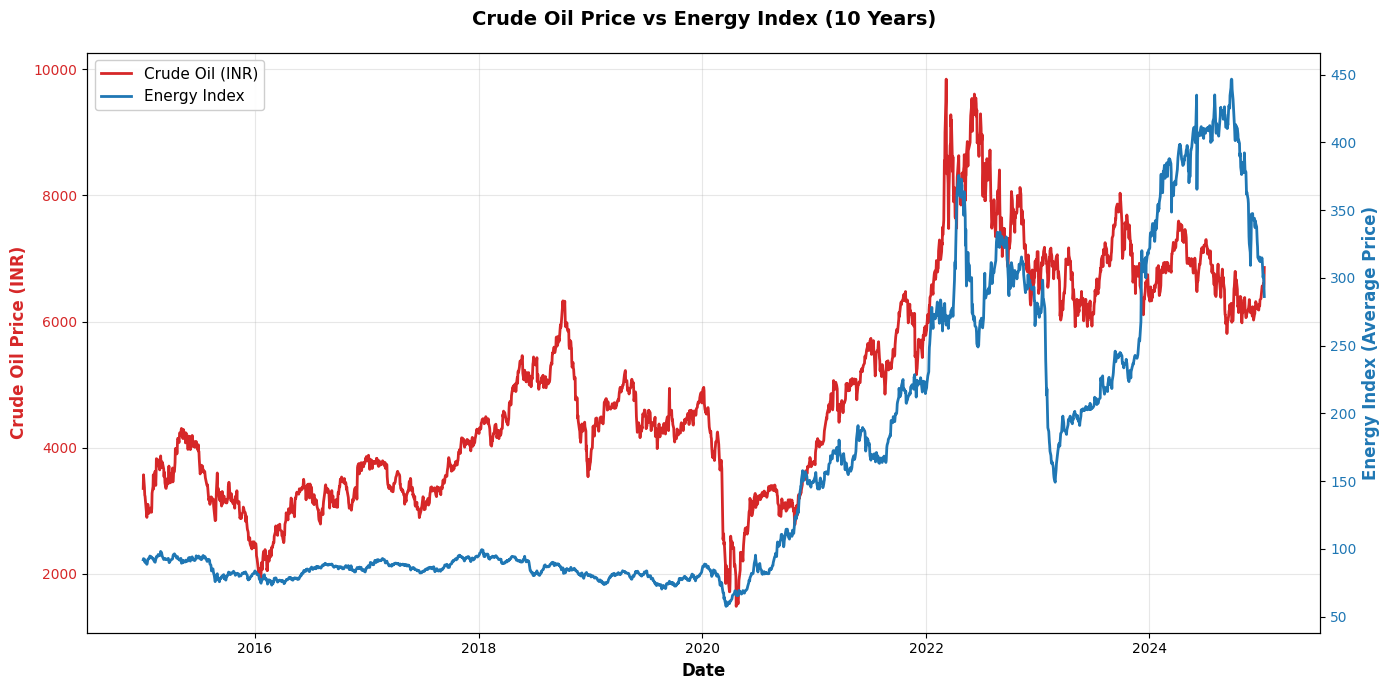

Statistics:

Crude Oil (INR):
  Mean: ₹4917.34
  Min:  ₹1485.22
  Max:  ₹9843.26
  Std:  ₹1689.04

Energy Index:
  Mean: ₹161.10
  Min:  ₹57.66
  Max:  ₹446.66
  Std:  ₹105.21

Correlation: 0.8066
→ Strong positive relationship


In [8]:
import matplotlib.pyplot as plt
# 1. Read the Excel file
# ----------------------------
input_file = "/content/Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx"
df = pd.read_excel(input_file, sheet_name="Daily_Data_With_Index", index_col=0)

print(f"Data loaded: {len(df)} rows")
print(f"Date range: {df.index[0].date()} to {df.index[-1].date()}\n")

# ----------------------------
# 2. Extract Crude Oil and Energy Index
# ----------------------------
crude_oil = df["Crude_INR"]
energy_index = df["Energy_Index"]

# ----------------------------
# 3. Create figure with dual y-axis
# ----------------------------
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Crude Oil on left y-axis
color_crude = 'tab:red'
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Crude Oil Price (INR)', color=color_crude, fontsize=12, fontweight='bold')
line1 = ax1.plot(crude_oil.index, crude_oil.values, color=color_crude, linewidth=2, label='Crude Oil (INR)')
ax1.tick_params(axis='y', labelcolor=color_crude)
ax1.grid(True, alpha=0.3)

# Plot Energy Index on right y-axis
ax2 = ax1.twinx()
color_index = 'tab:blue'
ax2.set_ylabel('Energy Index (Average Price)', color=color_index, fontsize=12, fontweight='bold')
line2 = ax2.plot(energy_index.index, energy_index.values, color=color_index, linewidth=2, label='Energy Index')
ax2.tick_params(axis='y', labelcolor=color_index)

# ----------------------------
# 4. Add title and legend
# ----------------------------
plt.title('Crude Oil Price vs Energy Index (10 Years)', fontsize=14, fontweight='bold', pad=20)

# Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=11, framealpha=0.95)

plt.tight_layout()

# ----------------------------
# 5. Save and display
# ----------------------------
output_plot = "Crude_vs_Energy_Index.png"
plt.savefig(output_plot, dpi=300, bbox_inches='tight')
print(f"✓ Plot saved as: {output_plot}\n")

plt.show()

# ----------------------------
# 6. Print statistics
# ----------------------------
print("Statistics:")
print(f"\nCrude Oil (INR):")
print(f"  Mean: ₹{crude_oil.mean():.2f}")
print(f"  Min:  ₹{crude_oil.min():.2f}")
print(f"  Max:  ₹{crude_oil.max():.2f}")
print(f"  Std:  ₹{crude_oil.std():.2f}")

print(f"\nEnergy Index:")
print(f"  Mean: ₹{energy_index.mean():.2f}")
print(f"  Min:  ₹{energy_index.min():.2f}")
print(f"  Max:  ₹{energy_index.max():.2f}")
print(f"  Std:  ₹{energy_index.std():.2f}")

# Calculate correlation
correlation = crude_oil.corr(energy_index)
print(f"\nCorrelation: {correlation:.4f}")

if correlation > 0.5:
    print("→ Strong positive relationship")
elif correlation > 0.2:
    print("→ Moderate positive relationship")
elif correlation > -0.2:
    print("→ Weak relationship")
elif correlation > -0.5:
    print("→ Moderate negative relationship")
else:
    print("→ Strong negative relationship")

Reading Excel file...

Loaded data shape: (2519, 12)
Date range: 2015-01-02 to 2025-01-10

Data after calculating log returns: 2518 rows

Sample data with log returns (first 10 rows):
              Crude_INR  Crude_INR_Log_Return  Energy_Index  \
Date                                                          
2015-01-05  3360.694612             -0.056500     56.894536   
2015-01-06  3236.571767             -0.037633     55.479912   
2015-01-07  3251.503338              0.004603     55.287166   
2015-01-08  3224.391961             -0.008373     56.204024   
2015-01-09  3140.293482             -0.026428     55.795056   
2015-01-12  2957.165639             -0.060085     55.346708   
2015-01-13  2891.748166             -0.022370     55.065886   
2015-01-14  3017.465264              0.042556     55.219846   
2015-01-15  2959.734906             -0.019317     56.296593   
2015-01-16  2959.545871             -0.000064     57.112085   

            Energy_Index_Log_Return  
Date                 

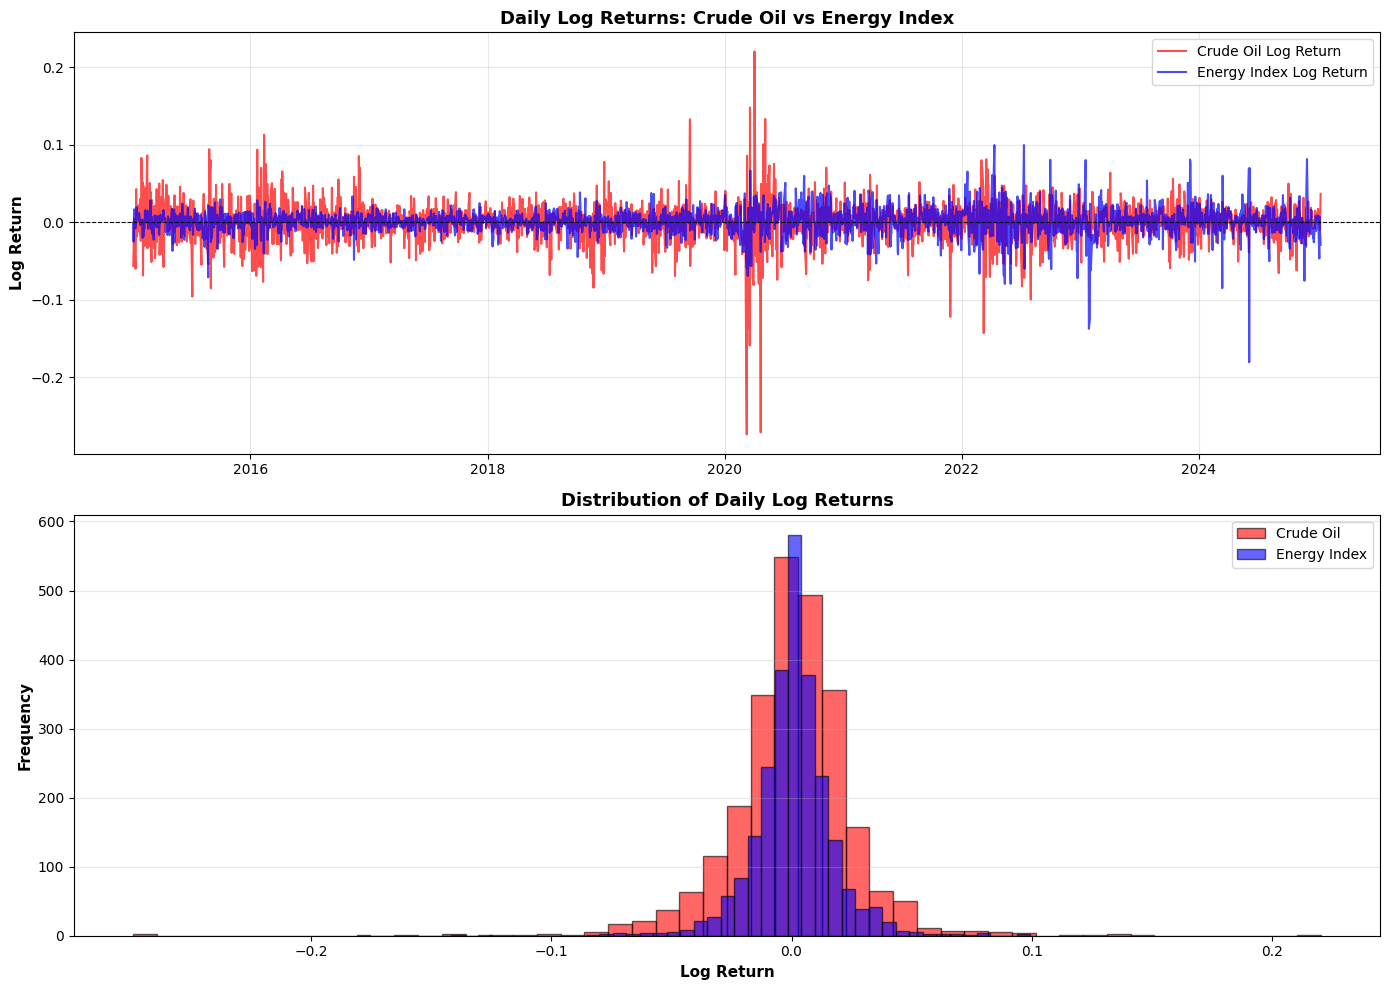

✓ Excel file created: Crude_Oil_Energy_Index_With_Log_Returns.xlsx

Sheets included:
  1. Daily_Data_With_Log_Returns - All prices + log returns
  2. Log_Returns_Only - Log returns columns only
  3. Statistics_Summary - Detailed statistics & annualized metrics
  4. Correlation_Matrix - Correlations between all columns


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Reading Excel file...\n")

# ----------------------------
# 1. Read the Excel file
# ----------------------------
input_file = "Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx"
df = pd.read_excel(input_file, sheet_name="Daily_Data_With_Index", index_col=0)

print(f"Loaded data shape: {df.shape}")
print(f"Date range: {df.index[0].date()} to {df.index[-1].date()}\n")

# ----------------------------
# 2. Calculate log returns
# ----------------------------
# Log return formula: ln(P_t / P_t-1)
df["Crude_INR_Log_Return"] = np.log(df["Crude_INR"] / df["Crude_INR"].shift(1))
df["Energy_Index_Log_Return"] = np.log(df["Energy_Index"] / df["Energy_Index"].shift(1))

# Remove first row (NaN from shift)
df = df.dropna(subset=["Crude_INR_Log_Return", "Energy_Index_Log_Return"])

print(f"Data after calculating log returns: {len(df)} rows\n")

# ----------------------------
# 3. Display sample data
# ----------------------------
print("Sample data with log returns (first 10 rows):")
print(df[["Crude_INR", "Crude_INR_Log_Return", "Energy_Index", "Energy_Index_Log_Return"]].head(10))
print("\n")

# ----------------------------
# 4. Statistics on log returns
# ----------------------------
print("="*70)
print("LOG RETURNS STATISTICS")
print("="*70)

print("\nCrude Oil Log Returns:")
print(f"  Mean:        {df['Crude_INR_Log_Return'].mean():.6f}")
print(f"  Std Dev:     {df['Crude_INR_Log_Return'].std():.6f}")
print(f"  Min:         {df['Crude_INR_Log_Return'].min():.6f}")
print(f"  Max:         {df['Crude_INR_Log_Return'].max():.6f}")
print(f"  Skewness:    {df['Crude_INR_Log_Return'].skew():.6f}")
print(f"  Kurtosis:    {df['Crude_INR_Log_Return'].kurtosis():.6f}")

print("\nEnergy Index Log Returns:")
print(f"  Mean:        {df['Energy_Index_Log_Return'].mean():.6f}")
print(f"  Std Dev:     {df['Energy_Index_Log_Return'].std():.6f}")
print(f"  Min:         {df['Energy_Index_Log_Return'].min():.6f}")
print(f"  Max:         {df['Energy_Index_Log_Return'].max():.6f}")
print(f"  Skewness:    {df['Energy_Index_Log_Return'].skew():.6f}")
print(f"  Kurtosis:    {df['Energy_Index_Log_Return'].kurtosis():.6f}")

# ----------------------------
# 5. Correlation of log returns
# ----------------------------
correlation = df["Crude_INR_Log_Return"].corr(df["Energy_Index_Log_Return"])
print(f"\nCorrelation (Log Returns): {correlation:.6f}\n")

# ----------------------------
# 6. Annualized statistics (252 trading days per year)
# ----------------------------
trading_days = 252

annualized_crude_mean = df['Crude_INR_Log_Return'].mean() * trading_days
annualized_crude_std = df['Crude_INR_Log_Return'].std() * np.sqrt(trading_days)

annualized_index_mean = df['Energy_Index_Log_Return'].mean() * trading_days
annualized_index_std = df['Energy_Index_Log_Return'].std() * np.sqrt(trading_days)

print("="*70)
print("ANNUALIZED STATISTICS (252 trading days)")
print("="*70)

print("\nCrude Oil:")
print(f"  Annualized Return:   {annualized_crude_mean*100:.2f}%")
print(f"  Annualized Volatility: {annualized_crude_std*100:.2f}%")

print("\nEnergy Index:")
print(f"  Annualized Return:   {annualized_index_mean*100:.2f}%")
print(f"  Annualized Volatility: {annualized_index_std*100:.2f}%\n")

# ----------------------------
# 7. Plot log returns
# ----------------------------
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Log returns over time
axes[0].plot(df.index, df["Crude_INR_Log_Return"], label="Crude Oil Log Return", color='red', linewidth=1.5, alpha=0.7)
axes[0].plot(df.index, df["Energy_Index_Log_Return"], label="Energy Index Log Return", color='blue', linewidth=1.5, alpha=0.7)
axes[0].set_ylabel('Log Return', fontsize=11, fontweight='bold')
axes[0].set_title('Daily Log Returns: Crude Oil vs Energy Index', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)

# Plot 2: Distribution of log returns
axes[1].hist(df["Crude_INR_Log_Return"], bins=50, alpha=0.6, label="Crude Oil", color='red', edgecolor='black')
axes[1].hist(df["Energy_Index_Log_Return"], bins=50, alpha=0.6, label="Energy Index", color='blue', edgecolor='black')
axes[1].set_xlabel('Log Return', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Distribution of Daily Log Returns', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
output_plot = "Log_Returns_Analysis.png"
plt.savefig(output_plot, dpi=300, bbox_inches='tight')
print(f"✓ Plot saved as: {output_plot}\n")
plt.show()

# ----------------------------
# 8. Export to Excel
# ----------------------------
output_file = "Crude_Oil_Energy_Index_With_Log_Returns.xlsx"

with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    # All data with log returns
    df.to_excel(writer, sheet_name="Daily_Data_With_Log_Returns")

    # Log returns only
    df[["Crude_INR_Log_Return", "Energy_Index_Log_Return"]].to_excel(
        writer, sheet_name="Log_Returns_Only")

    # Statistics summary
    stats_summary = pd.DataFrame({
        "Metric": [
            "Mean Daily Return",
            "Std Dev (Daily)",
            "Min Return",
            "Max Return",
            "Skewness",
            "Kurtosis",
            "Annualized Return",
            "Annualized Volatility",
            "Correlation"
        ],
        "Crude_Oil": [
            df['Crude_INR_Log_Return'].mean(),
            df['Crude_INR_Log_Return'].std(),
            df['Crude_INR_Log_Return'].min(),
            df['Crude_INR_Log_Return'].max(),
            df['Crude_INR_Log_Return'].skew(),
            df['Crude_INR_Log_Return'].kurtosis(),
            annualized_crude_mean,
            annualized_crude_std,
            correlation
        ],
        "Energy_Index": [
            df['Energy_Index_Log_Return'].mean(),
            df['Energy_Index_Log_Return'].std(),
            df['Energy_Index_Log_Return'].min(),
            df['Energy_Index_Log_Return'].max(),
            df['Energy_Index_Log_Return'].skew(),
            df['Energy_Index_Log_Return'].kurtosis(),
            annualized_index_mean,
            annualized_index_std,
            correlation
        ]
    })
    stats_summary.to_excel(writer, sheet_name="Statistics_Summary", index=False)

    # Correlation matrix
    corr_matrix = df[["Crude_INR", "Energy_Index", "Crude_INR_Log_Return",
                      "Energy_Index_Log_Return"]].corr()
    corr_matrix.to_excel(writer, sheet_name="Correlation_Matrix")

print(f"✓ Excel file created: {output_file}")
print(f"\nSheets included:")
print("  1. Daily_Data_With_Log_Returns - All prices + log returns")
print("  2. Log_Returns_Only - Log returns columns only")
print("  3. Statistics_Summary - Detailed statistics & annualized metrics")
print("  4. Correlation_Matrix - Correlations between all columns")

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings('ignore')

# ----------------------------
# 1. Read data
# ----------------------------
df = pd.read_excel("Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx",
                   sheet_name="Daily_Data_With_Index", index_col=0)

# Calculate log returns first
import numpy as np

df["Crude_INR_Log_Return"] = np.log(df["Crude_INR"] / df["Crude_INR"].shift(1))
df["Energy_Index_Log_Return"] = np.log(df["Energy_Index"] / df["Energy_Index"].shift(1))

print("Calculated log returns for both series\n")

# ----------------------------
# 2. Function to run ADF test
# ----------------------------
def run_adf_test(series, name):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"\n{name}")
    print("="*60)
    print(f"ADF Statistic:     {result[0]:.6f}")
    print(f"P-value:           {result[1]:.6f}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"  {key}: {value:.3f}")

    if result[1] < 0.05:
        print(f"✓ STATIONARY (p-value < 0.05, reject H0)")
    else:
        print(f"✗ NON-STATIONARY (p-value >= 0.05, fail to reject H0)")

    return result[1] < 0.05

# ----------------------------
# 3. Test PRICES (should be non-stationary)
# ----------------------------
print("\n" + "="*60)
print("PRICES - ADF TEST")
print("="*60)

run_adf_test(df["Crude_INR"], "Crude Oil Price (INR)")
run_adf_test(df["Energy_Index"], "Energy Index Price")

# ----------------------------
# 4. Test LOG RETURNS (should be stationary)
# ----------------------------
print("\n" + "="*60)
print("LOG RETURNS - ADF TEST")
print("="*60)

run_adf_test(df["Crude_INR_Log_Return"], "Crude Oil Log Returns")
run_adf_test(df["Energy_Index_Log_Return"], "Energy Index Log Returns")

print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print("✓ Prices are NON-stationary → Need differencing")
print("✓ Log Returns are STATIONARY → Good for regression (OLS)")
print("="*60 + "\n")

Calculated log returns for both series


PRICES - ADF TEST

Crude Oil Price (INR)
ADF Statistic:     -1.560491
P-value:           0.503404
Critical Values:
  1%: -3.433
  5%: -2.863
  10%: -2.567
✗ NON-STATIONARY (p-value >= 0.05, fail to reject H0)

Energy Index Price
ADF Statistic:     -0.831272
P-value:           0.809763
Critical Values:
  1%: -3.433
  5%: -2.863
  10%: -2.567
✗ NON-STATIONARY (p-value >= 0.05, fail to reject H0)

LOG RETURNS - ADF TEST

Crude Oil Log Returns
ADF Statistic:     -10.698315
P-value:           0.000000
Critical Values:
  1%: -3.433
  5%: -2.863
  10%: -2.567
✓ STATIONARY (p-value < 0.05, reject H0)

Energy Index Log Returns
ADF Statistic:     -11.987231
P-value:           0.000000
Critical Values:
  1%: -3.433
  5%: -2.863
  10%: -2.567
✓ STATIONARY (p-value < 0.05, reject H0)

SUMMARY
✓ Prices are NON-stationary → Need differencing
✓ Log Returns are STATIONARY → Good for regression (OLS)



In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

Sample size: 2518 observations

CAPM REGRESSION ANALYSIS
Risk-Free Rate (Annual): 6.75%
Risk-Free Rate (Daily):  0.026786%

CAPM REGRESSION EQUATION

(R_Energy - R_f) = 0.00041903 + 0.04856587 × (R_Crude - R_f) + ε

Where: R_f = 0.00026786 (daily) or 6.75% (annual)

OLS REGRESSION - COMPLETE ANALYSIS
                             OLS Regression Results                             
Dep. Variable:     Excess_Energy_Return   R-squared:                       0.005
Model:                              OLS   Adj. R-squared:                  0.005
Method:                   Least Squares   F-statistic:                     13.76
Date:                  Sat, 15 Nov 2025   Prob (F-statistic):           0.000213
Time:                          06:36:02   Log-Likelihood:                 6679.9
No. Observations:                  2518   AIC:                        -1.336e+04
Df Residuals:                      2516   BIC:                        -1.334e+04
Df Model:                             1           

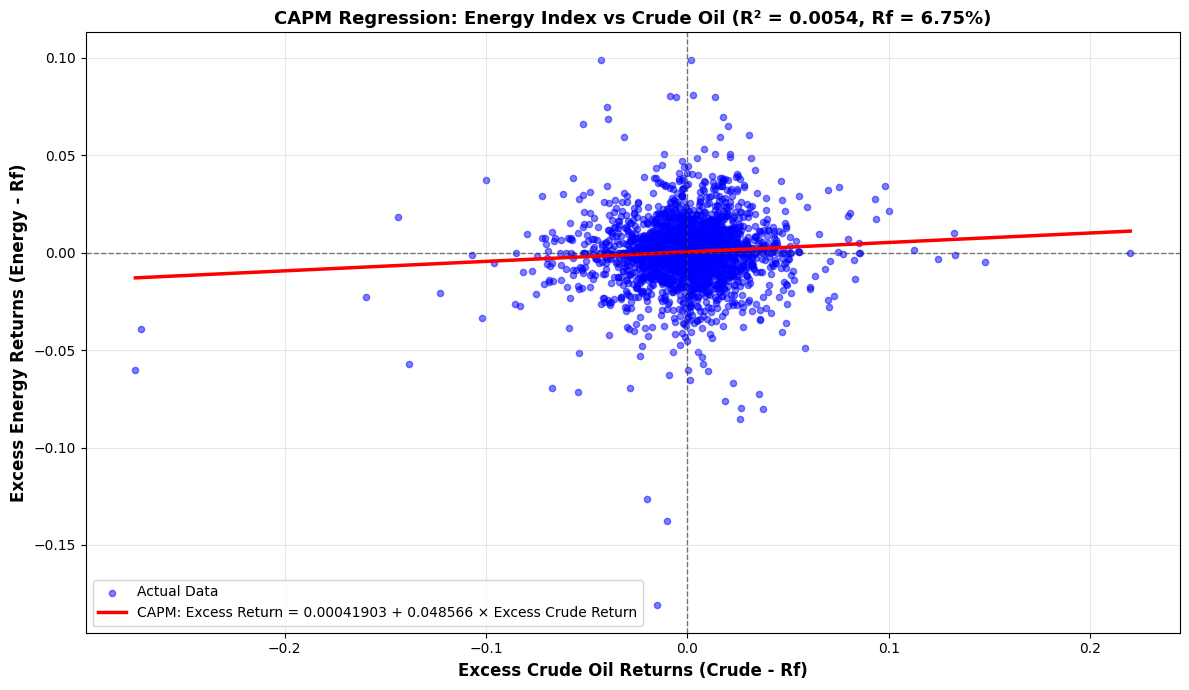

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# ----------------------------
# 1. Read and prepare data
# ----------------------------
df = pd.read_excel("Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx",
                   sheet_name="Daily_Data_With_Index", index_col=0)

# Calculate log returns
df["Crude_Log_Return"] = np.log(df["Crude_INR"] / df["Crude_INR"].shift(1))
df["Energy_Log_Return"] = np.log(df["Energy_Index"] / df["Energy_Index"].shift(1))

# Remove NaN values
df_clean = df[["Crude_Log_Return", "Energy_Log_Return"]].dropna()

print(f"Sample size: {len(df_clean)} observations\n")

# ----------------------------
# 2. CAPM Parameters
# ----------------------------
risk_free_rate_annual = 0.0675  # 6.75% per annum
risk_free_rate_daily = risk_free_rate_annual / 252  # Convert to daily

# Calculate excess returns
df_clean["Excess_Energy_Return"] = df_clean["Energy_Log_Return"] - risk_free_rate_daily
df_clean["Excess_Crude_Return"] = df_clean["Crude_Log_Return"] - risk_free_rate_daily

print("="*100)
print("CAPM REGRESSION ANALYSIS")
print("="*100)
print(f"Risk-Free Rate (Annual): {risk_free_rate_annual*100:.2f}%")
print(f"Risk-Free Rate (Daily):  {risk_free_rate_daily*100:.6f}%\n")

# ----------------------------
# 3. Run CAPM Regression (OLS on Excess Returns)
# ----------------------------
# CAPM: R_Energy - R_f = α + β(R_Crude - R_f) + ε
model = ols('Excess_Energy_Return ~ Excess_Crude_Return', data=df_clean).fit()

# ----------------------------
# 4. Extract CAPM Results
# ----------------------------
alpha = model.params['Intercept']
beta = model.params['Excess_Crude_Return']

print("="*100)
print("CAPM REGRESSION EQUATION")
print("="*100)
print(f"\n(R_Energy - R_f) = {alpha:.8f} + {beta:.8f} × (R_Crude - R_f) + ε")
print(f"\nWhere: R_f = {risk_free_rate_daily:.8f} (daily) or {risk_free_rate_annual*100:.2f}% (annual)\n")

# ----------------------------
# 5. Display Full Summary
# ----------------------------
print("="*100)
print("OLS REGRESSION - COMPLETE ANALYSIS")
print("="*100)
print(model.summary())

# ----------------------------
# 6. CAPM Analysis Table
# ----------------------------
print("\n" + "="*100)
print("CAPM REGRESSION ANALYSIS TABLE")
print("="*100)

capm_table = pd.DataFrame({
    'Parameter': ['Jensen\'s Alpha (α)', 'Beta (β)'],
    'Coefficient': [alpha, beta],
    'Std. Error': [model.bse['Intercept'], model.bse['Excess_Crude_Return']],
    't-statistic': [model.tvalues['Intercept'], model.tvalues['Excess_Crude_Return']],
    'p-value': [model.pvalues['Intercept'], model.pvalues['Excess_Crude_Return']],
    '[95% Conf. Int. Lower]': [model.conf_int().loc['Intercept', 0], model.conf_int().loc['Excess_Crude_Return', 0]],
    '[95% Conf. Int. Upper]': [model.conf_int().loc['Intercept', 1], model.conf_int().loc['Excess_Crude_Return', 1]]
})

print(capm_table.to_string(index=False))

# ----------------------------
# 7. Model Fit Statistics
# ----------------------------
print("\n" + "="*100)
print("MODEL FIT STATISTICS")
print("="*100)

fit_stats = pd.DataFrame({
    'Statistic': [
        'R-squared',
        'Adjusted R-squared',
        'F-statistic',
        'F-statistic p-value',
        'AIC',
        'BIC',
        'Log-Likelihood',
        'Residual Std. Error',
        'Degrees of Freedom',
        'Observations'
    ],
    'Value': [
        f"{model.rsquared:.6f}",
        f"{model.rsquared_adj:.6f}",
        f"{model.fvalue:.4f}",
        f"{model.f_pvalue:.6e}",
        f"{model.aic:.4f}",
        f"{model.bic:.4f}",
        f"{model.llf:.4f}",
        f"{np.sqrt(model.mse_resid):.8f}",
        f"{model.df_resid}",
        f"{len(df_clean)}"
    ]
})

print(fit_stats.to_string(index=False))

# ----------------------------
# 8. CAPM Interpretation
# ----------------------------
print("\n" + "="*100)
print("CAPM INTERPRETATION")
print("="*100)
print(f"\nJensen's Alpha (α): {alpha:.8f}")
print(f"  → Daily abnormal return: {alpha*100:.6f}%")
print(f"  → Annualized abnormal return: {alpha*252*100:.4f}%")
if alpha > 0:
    print(f"  → Energy Index OUTPERFORMS the CAPM prediction (positive alpha)")
else:
    print(f"  → Energy Index UNDERPERFORMS the CAPM prediction (negative alpha)")

print(f"\nBeta (β): {beta:.8f}")
print(f"  → For every 1% excess return in Crude Oil, Energy returns change by {beta*100:.4f}%")
if beta > 1:
    print(f"  → Energy Index is MORE VOLATILE than Crude Oil (aggressive)")
elif beta < 1:
    print(f"  → Energy Index is LESS VOLATILE than Crude Oil (defensive)")
else:
    print(f"  → Energy Index has similar volatility to Crude Oil")

# Calculate expected return using CAPM
crude_excess_return_mean = df_clean["Excess_Crude_Return"].mean()
expected_excess_return = alpha + beta * crude_excess_return_mean
expected_annual_return = (expected_excess_return * 252) + risk_free_rate_annual

print(f"\nExpected Annual Return (CAPM):")
print(f"  → Risk-Free Rate: {risk_free_rate_annual*100:.2f}%")
print(f"  → Expected Risk Premium: {expected_excess_return*252*100:.4f}%")
print(f"  → Expected Total Return: {expected_annual_return*100:.4f}%")
print("="*100 + "\n")

# ----------------------------
# 9. Plot CAPM Regression Line
# ----------------------------
fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(df_clean["Excess_Crude_Return"], df_clean["Excess_Energy_Return"],
          alpha=0.5, s=20, color='blue', label='Actual Data')

x_range = np.array([df_clean["Excess_Crude_Return"].min(), df_clean["Excess_Crude_Return"].max()])
y_line = alpha + beta * x_range
ax.plot(x_range, y_line, color='red', linewidth=2.5,
       label=f'CAPM: Excess Return = {alpha:.8f} + {beta:.6f} × Excess Crude Return')

ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)

ax.set_xlabel('Excess Crude Oil Returns (Crude - Rf)', fontsize=12, fontweight='bold')
ax.set_ylabel('Excess Energy Returns (Energy - Rf)', fontsize=12, fontweight='bold')
ax.set_title(f'CAPM Regression: Energy Index vs Crude Oil (R² = {model.rsquared:.4f}, Rf = {risk_free_rate_annual*100:.2f}%)',
             fontsize=13, fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('CAPM_Regression_Chart.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: CAPM_Regression_Chart.png\n")
plt.show()

✓ Nifty 50 data downloaded: 1459 observations



/tmp/ipython-input-2005778655.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty_data = yf.download('^NSEI', start='2020-01-01', end=datetime.now().strftime('%Y-%m-%d'), progress=False)


Sample size: 1206 observations

CAPM REGRESSION ANALYSIS
Risk-Free Rate (Annual): 6.75%
Risk-Free Rate (Daily): 0.026786%

CAPM REGRESSION EQUATIONS

Model 1 - Crude Oil as Market Proxy:
(R_Energy - R_f) = 0.00098402 + 0.05386477 × (R_Crude - R_f) + ε

Model 2 - Nifty 50 as Market Proxy:
(R_Energy - R_f) = 0.00076382 + 0.83124304 × (R_Nifty50 - R_f) + ε

Model 3 - Multi-factor (Crude Oil + Nifty 50):
(R_Energy - R_f) = 0.00076427 + 0.02027972 × (R_Crude - R_f) + 0.82624792 × (R_Nifty50 - R_f) + ε

MODEL 1: OLS REGRESSION - ENERGY vs CRUDE OIL
                             OLS Regression Results                             
Dep. Variable:     Excess_Energy_Return   R-squared:                       0.005
Model:                              OLS   Adj. R-squared:                  0.005
Method:                   Least Squares   F-statistic:                     6.532
Date:                  Sat, 22 Nov 2025   Prob (F-statistic):             0.0107
Time:                          11:01:01   Log-

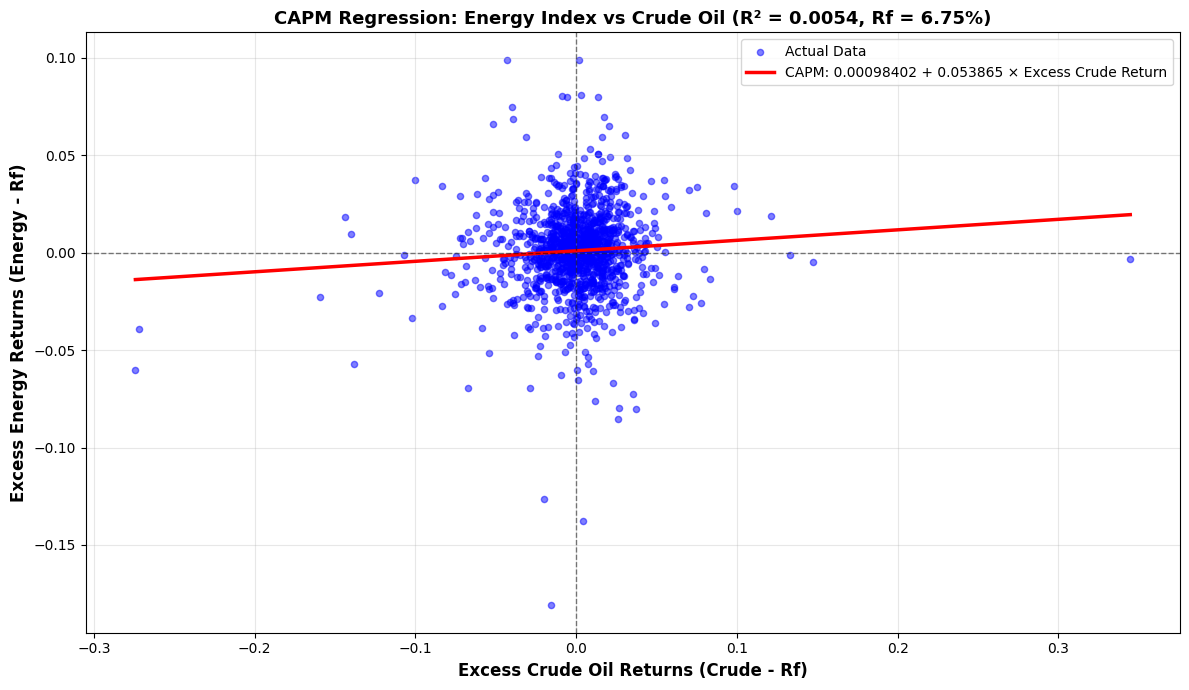

✓ Chart saved as: CAPM_Regression_Nifty50.png



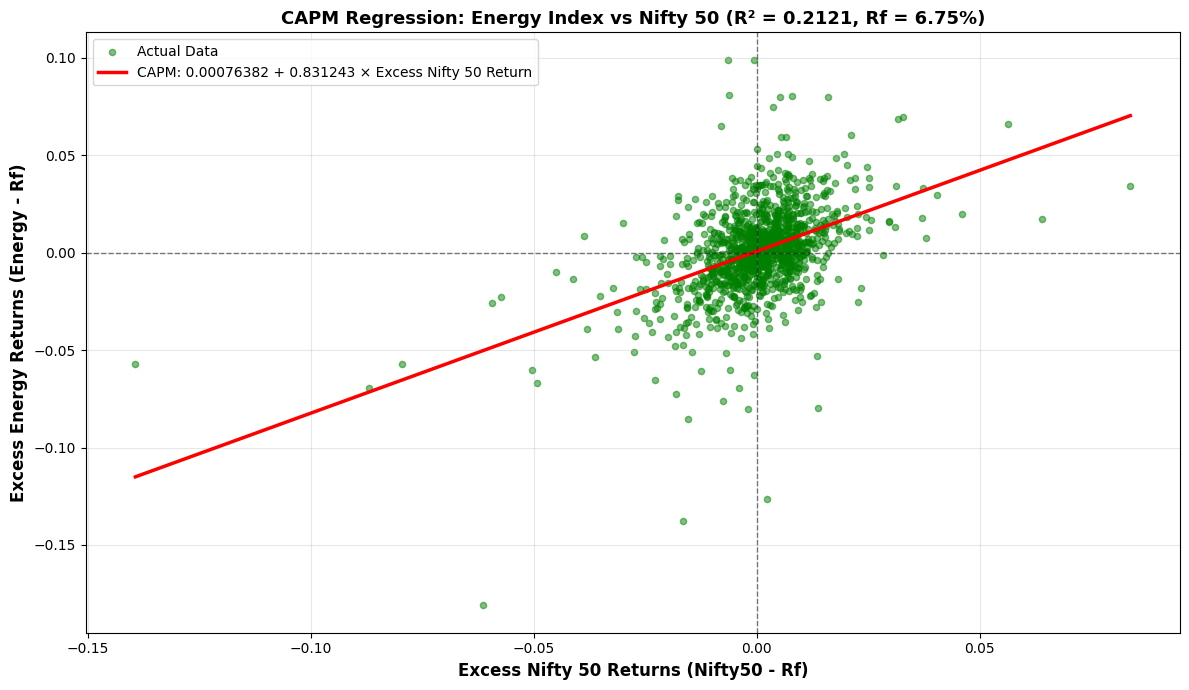

✓ Chart saved as: CAPM_Multifactor_Analysis.png



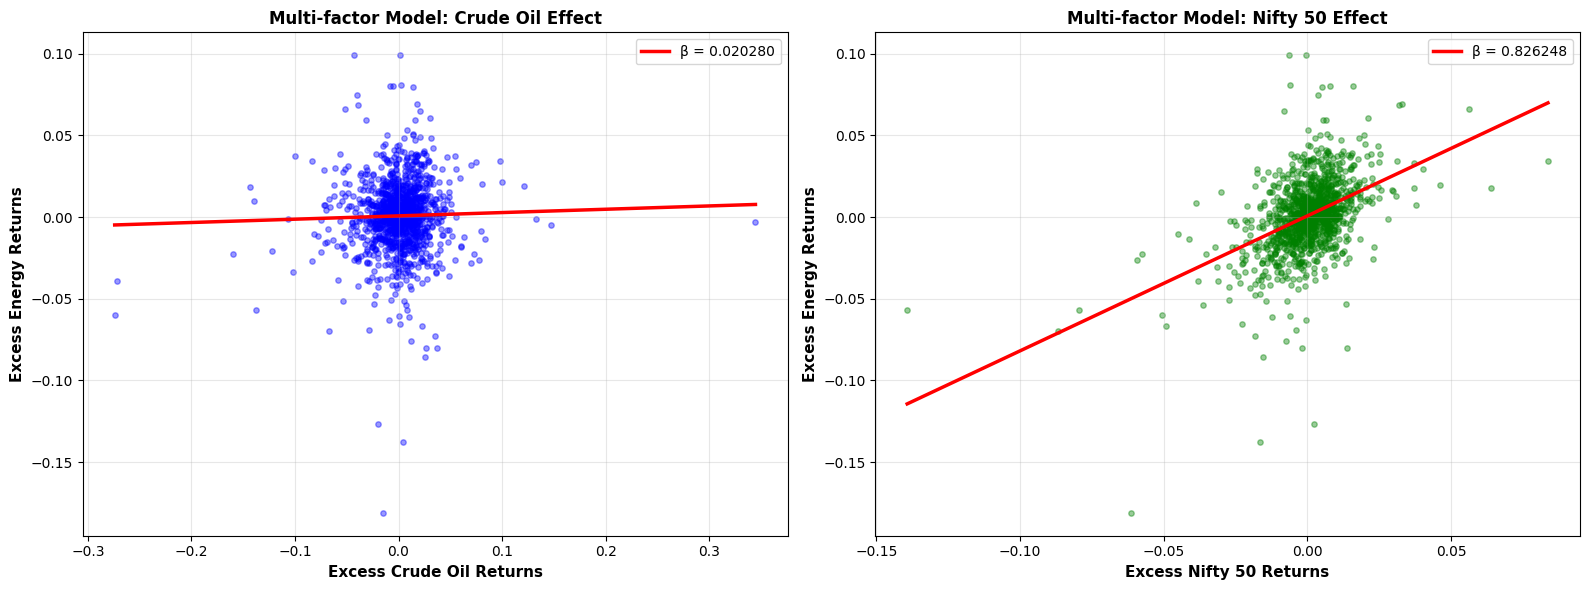

ANALYSIS COMPLETE!


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

# ----------------------------
# 0. Download Nifty 50 Data from Yahoo Finance
# ----------------------------
print("Downloading Nifty 50 data from Yahoo Finance...")
nifty_data = yf.download('^NSEI', start='2020-01-01', end=datetime.now().strftime('%Y-%m-%d'), progress=False)
print(f"✓ Nifty 50 data downloaded: {len(nifty_data)} observations\n")

# Extract close price and flatten MultiIndex if present
nifty_close = nifty_data[['Close']].rename(columns={'Close': 'Nifty50_Close'})
if isinstance(nifty_close.columns, pd.MultiIndex):
    nifty_close.columns = nifty_close.columns.get_level_values(0)
nifty_close.index.name = None

# ----------------------------
# 1. Read and prepare data
# ----------------------------
df = pd.read_excel("Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx", sheet_name="Daily_Data_With_Index", index_col=0)

# Merge Nifty 50 data with existing data
df = df.merge(nifty_close, left_index=True, right_index=True, how='inner')

# Calculate log returns
df["Crude_Log_Return"] = np.log(df["Crude_INR"] / df["Crude_INR"].shift(1))
df["Energy_Log_Return"] = np.log(df["Energy_Index"] / df["Energy_Index"].shift(1))
df["Nifty50_Log_Return"] = np.log(df["Nifty50_Close"] / df["Nifty50_Close"].shift(1))

# Remove NaN values
df_clean = df[["Crude_Log_Return", "Energy_Log_Return", "Nifty50_Log_Return"]].dropna()
print(f"Sample size: {len(df_clean)} observations\n")

# ----------------------------
# 2. CAPM Parameters
# ----------------------------
risk_free_rate_annual = 0.0675  # 6.75% per annum
risk_free_rate_daily = risk_free_rate_annual / 252  # Convert to daily

# Calculate excess returns
df_clean["Excess_Energy_Return"] = df_clean["Energy_Log_Return"] - risk_free_rate_daily
df_clean["Excess_Crude_Return"] = df_clean["Crude_Log_Return"] - risk_free_rate_daily
df_clean["Excess_Nifty50_Return"] = df_clean["Nifty50_Log_Return"] - risk_free_rate_daily

print("="*100)
print("CAPM REGRESSION ANALYSIS")
print("="*100)
print(f"Risk-Free Rate (Annual): {risk_free_rate_annual*100:.2f}%")
print(f"Risk-Free Rate (Daily): {risk_free_rate_daily*100:.6f}%\n")

# ----------------------------
# 3. Run CAPM Regression Models
# ----------------------------
print("="*100)
print("CAPM REGRESSION EQUATIONS")
print("="*100)

# Model 1: Energy vs Crude Oil
model_crude = ols('Excess_Energy_Return ~ Excess_Crude_Return', data=df_clean).fit()
alpha_crude = model_crude.params['Intercept']
beta_crude = model_crude.params['Excess_Crude_Return']

print(f"\nModel 1 - Crude Oil as Market Proxy:")
print(f"(R_Energy - R_f) = {alpha_crude:.8f} + {beta_crude:.8f} × (R_Crude - R_f) + ε\n")

# Model 2: Energy vs Nifty 50
model_nifty = ols('Excess_Energy_Return ~ Excess_Nifty50_Return', data=df_clean).fit()
alpha_nifty = model_nifty.params['Intercept']
beta_nifty = model_nifty.params['Excess_Nifty50_Return']

print(f"Model 2 - Nifty 50 as Market Proxy:")
print(f"(R_Energy - R_f) = {alpha_nifty:.8f} + {beta_nifty:.8f} × (R_Nifty50 - R_f) + ε\n")

# Model 3: Multi-factor (Crude Oil + Nifty 50)
model_multi = ols('Excess_Energy_Return ~ Excess_Crude_Return + Excess_Nifty50_Return', data=df_clean).fit()
alpha_multi = model_multi.params['Intercept']
beta_crude_multi = model_multi.params['Excess_Crude_Return']
beta_nifty_multi = model_multi.params['Excess_Nifty50_Return']

print(f"Model 3 - Multi-factor (Crude Oil + Nifty 50):")
print(f"(R_Energy - R_f) = {alpha_multi:.8f} + {beta_crude_multi:.8f} × (R_Crude - R_f) + {beta_nifty_multi:.8f} × (R_Nifty50 - R_f) + ε\n")

# ----------------------------
# 4. Display Full Summaries
# ----------------------------
print("="*100)
print("MODEL 1: OLS REGRESSION - ENERGY vs CRUDE OIL")
print("="*100)
print(model_crude.summary())

print("\n" + "="*100)
print("MODEL 2: OLS REGRESSION - ENERGY vs NIFTY 50")
print("="*100)
print(model_nifty.summary())

print("\n" + "="*100)
print("MODEL 3: OLS REGRESSION - MULTI-FACTOR (CRUDE + NIFTY 50)")
print("="*100)
print(model_multi.summary())

# ----------------------------
# 5. Comparison Table
# ----------------------------
print("\n" + "="*100)
print("CAPM REGRESSION COMPARISON TABLE")
print("="*100)

comparison_table = pd.DataFrame({
    'Parameter': ['Jensen\'s Alpha (α)', 'Beta (Crude Oil)', 'Beta (Nifty 50)', 'R-squared', 'Adj. R-squared', 'F-statistic'],
    'Model 1: Crude': [
        f"{alpha_crude:.8f}",
        f"{beta_crude:.8f}",
        "—",
        f"{model_crude.rsquared:.6f}",
        f"{model_crude.rsquared_adj:.6f}",
        f"{model_crude.fvalue:.4f}"
    ],
    'Model 2: Nifty 50': [
        f"{alpha_nifty:.8f}",
        "—",
        f"{beta_nifty:.8f}",
        f"{model_nifty.rsquared:.6f}",
        f"{model_nifty.rsquared_adj:.6f}",
        f"{model_nifty.fvalue:.4f}"
    ],
    'Model 3: Multi-factor': [
        f"{alpha_multi:.8f}",
        f"{beta_crude_multi:.8f}",
        f"{beta_nifty_multi:.8f}",
        f"{model_multi.rsquared:.6f}",
        f"{model_multi.rsquared_adj:.6f}",
        f"{model_multi.fvalue:.4f}"
    ]
})

print(comparison_table.to_string(index=False))

# ----------------------------
# 6. CAPM Interpretation
# ----------------------------
print("\n" + "="*100)
print("CAPM INTERPRETATION & ANALYSIS")
print("="*100)

print(f"\n{'Model 1: CRUDE OIL AS MARKET PROXY':^100}")
print("-"*100)
print(f"Jensen's Alpha (α): {alpha_crude:.8f} ({alpha_crude*100:.6f}% daily / {alpha_crude*252*100:.4f}% annualized)")
print(f"Beta (β): {beta_crude:.8f}")
print(f"Interpretation: For every 1% excess return in Crude Oil, Energy returns change by {beta_crude*100:.4f}%")
print(f"Volatility: {'More volatile (aggressive)' if beta_crude > 1 else 'Less volatile (defensive)' if beta_crude < 1 else 'Similar volatility'}")

print(f"\n{'Model 2: NIFTY 50 AS MARKET PROXY':^100}")
print("-"*100)
print(f"Jensen's Alpha (α): {alpha_nifty:.8f} ({alpha_nifty*100:.6f}% daily / {alpha_nifty*252*100:.4f}% annualized)")
print(f"Beta (β): {beta_nifty:.8f}")
print(f"Interpretation: For every 1% excess return in Nifty 50, Energy returns change by {beta_nifty*100:.4f}%")
print(f"Volatility: {'More volatile (aggressive)' if beta_nifty > 1 else 'Less volatile (defensive)' if beta_nifty < 1 else 'Similar volatility'}")

print(f"\n{'Model 3: MULTI-FACTOR ANALYSIS':^100}")
print("-"*100)
print(f"Jensen's Alpha (α): {alpha_multi:.8f} ({alpha_multi*100:.6f}% daily / {alpha_multi*252*100:.4f}% annualized)")
print(f"Beta (Crude Oil): {beta_crude_multi:.8f}")
print(f"Beta (Nifty 50): {beta_nifty_multi:.8f}")
print(f"Model Fit: R² = {model_multi.rsquared:.6f} (explains {model_multi.rsquared*100:.2f}% of Energy returns)")

print("\n" + "="*100 + "\n")

# ----------------------------
# 7. Plot 1: CAPM Regression Line (Crude Oil)
# ----------------------------
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(df_clean["Excess_Crude_Return"], df_clean["Excess_Energy_Return"], alpha=0.5, s=20, color='blue', label='Actual Data')
x_range = np.array([df_clean["Excess_Crude_Return"].min(), df_clean["Excess_Crude_Return"].max()])
y_line = alpha_crude + beta_crude * x_range
ax.plot(x_range, y_line, color='red', linewidth=2.5, label=f'CAPM: {alpha_crude:.8f} + {beta_crude:.6f} × Excess Crude Return')
ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.set_xlabel('Excess Crude Oil Returns (Crude - Rf)', fontsize=12, fontweight='bold')
ax.set_ylabel('Excess Energy Returns (Energy - Rf)', fontsize=12, fontweight='bold')
ax.set_title(f'CAPM Regression: Energy Index vs Crude Oil (R² = {model_crude.rsquared:.4f}, Rf = {risk_free_rate_annual*100:.2f}%)', fontsize=13, fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('CAPM_Regression_Crude.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: CAPM_Regression_Crude.png\n")
plt.show()

# ----------------------------
# 8. Plot 2: CAPM Regression Line (Nifty 50)
# ----------------------------
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(df_clean["Excess_Nifty50_Return"], df_clean["Excess_Energy_Return"], alpha=0.5, s=20, color='green', label='Actual Data')
x_range = np.array([df_clean["Excess_Nifty50_Return"].min(), df_clean["Excess_Nifty50_Return"].max()])
y_line = alpha_nifty + beta_nifty * x_range
ax.plot(x_range, y_line, color='red', linewidth=2.5, label=f'CAPM: {alpha_nifty:.8f} + {beta_nifty:.6f} × Excess Nifty 50 Return')
ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.set_xlabel('Excess Nifty 50 Returns (Nifty50 - Rf)', fontsize=12, fontweight='bold')
ax.set_ylabel('Excess Energy Returns (Energy - Rf)', fontsize=12, fontweight='bold')
ax.set_title(f'CAPM Regression: Energy Index vs Nifty 50 (R² = {model_nifty.rsquared:.4f}, Rf = {risk_free_rate_annual*100:.2f}%)', fontsize=13, fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('CAPM_Regression_Nifty50.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: CAPM_Regression_Nifty50.png\n")
plt.show()

# ----------------------------
# 9. Plot 3: Multi-factor Visualization
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Crude Oil
axes[0].scatter(df_clean["Excess_Crude_Return"], df_clean["Excess_Energy_Return"], alpha=0.4, s=15, color='blue')
x_range_crude = np.array([df_clean["Excess_Crude_Return"].min(), df_clean["Excess_Crude_Return"].max()])
axes[0].plot(x_range_crude, alpha_multi + beta_crude_multi * x_range_crude, 'r-', linewidth=2.5, label=f'β = {beta_crude_multi:.6f}')
axes[0].set_xlabel('Excess Crude Oil Returns', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Excess Energy Returns', fontsize=11, fontweight='bold')
axes[0].set_title('Multi-factor Model: Crude Oil Effect', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Subplot 2: Nifty 50
axes[1].scatter(df_clean["Excess_Nifty50_Return"], df_clean["Excess_Energy_Return"], alpha=0.4, s=15, color='green')
x_range_nifty = np.array([df_clean["Excess_Nifty50_Return"].min(), df_clean["Excess_Nifty50_Return"].max()])
axes[1].plot(x_range_nifty, alpha_multi + beta_nifty_multi * x_range_nifty, 'r-', linewidth=2.5, label=f'β = {beta_nifty_multi:.6f}')
axes[1].set_xlabel('Excess Nifty 50 Returns', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Excess Energy Returns', fontsize=11, fontweight='bold')
axes[1].set_title('Multi-factor Model: Nifty 50 Effect', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('CAPM_Multifactor_Analysis.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: CAPM_Multifactor_Analysis.png\n")
plt.show()

print("="*100)
print("ANALYSIS COMPLETE!")
print("="*100)

ACF/PACF ANALYSIS FOR ENERGY INDEX RETURNS

Sample size: 2518 observations
Date range: 2015-01-05 00:00:00 to 2025-01-10 00:00:00

DESCRIPTIVE STATISTICS OF ENERGY INDEX RETURNS
count    2518.000000
mean        0.000687
std         0.017096
min        -0.180775
25%        -0.006657
50%         0.000165
75%         0.008575
max         0.099394
Name: Energy_Log_Return, dtype: float64

ADDITIONAL STATISTICS:
----------------------------------------------------------------------------------------------------
Skewness: -0.766782
Kurtosis: 11.214989
Interpretation: Negatively skewed (left tail)
Interpretation: Leptokurtic (fat tails)

AUGMENTED DICKEY-FULLER TEST (Stationarity Test)
H0: Series has a unit root (non-stationary)
H1: Series is stationary
----------------------------------------------------------------------------------------------------

Energy Index Returns:
  ADF Statistic: -11.987232
  P-value: 0.000000
  Lags Used: 10
  Number of Observations: 2507
  Critical Values:
    1%

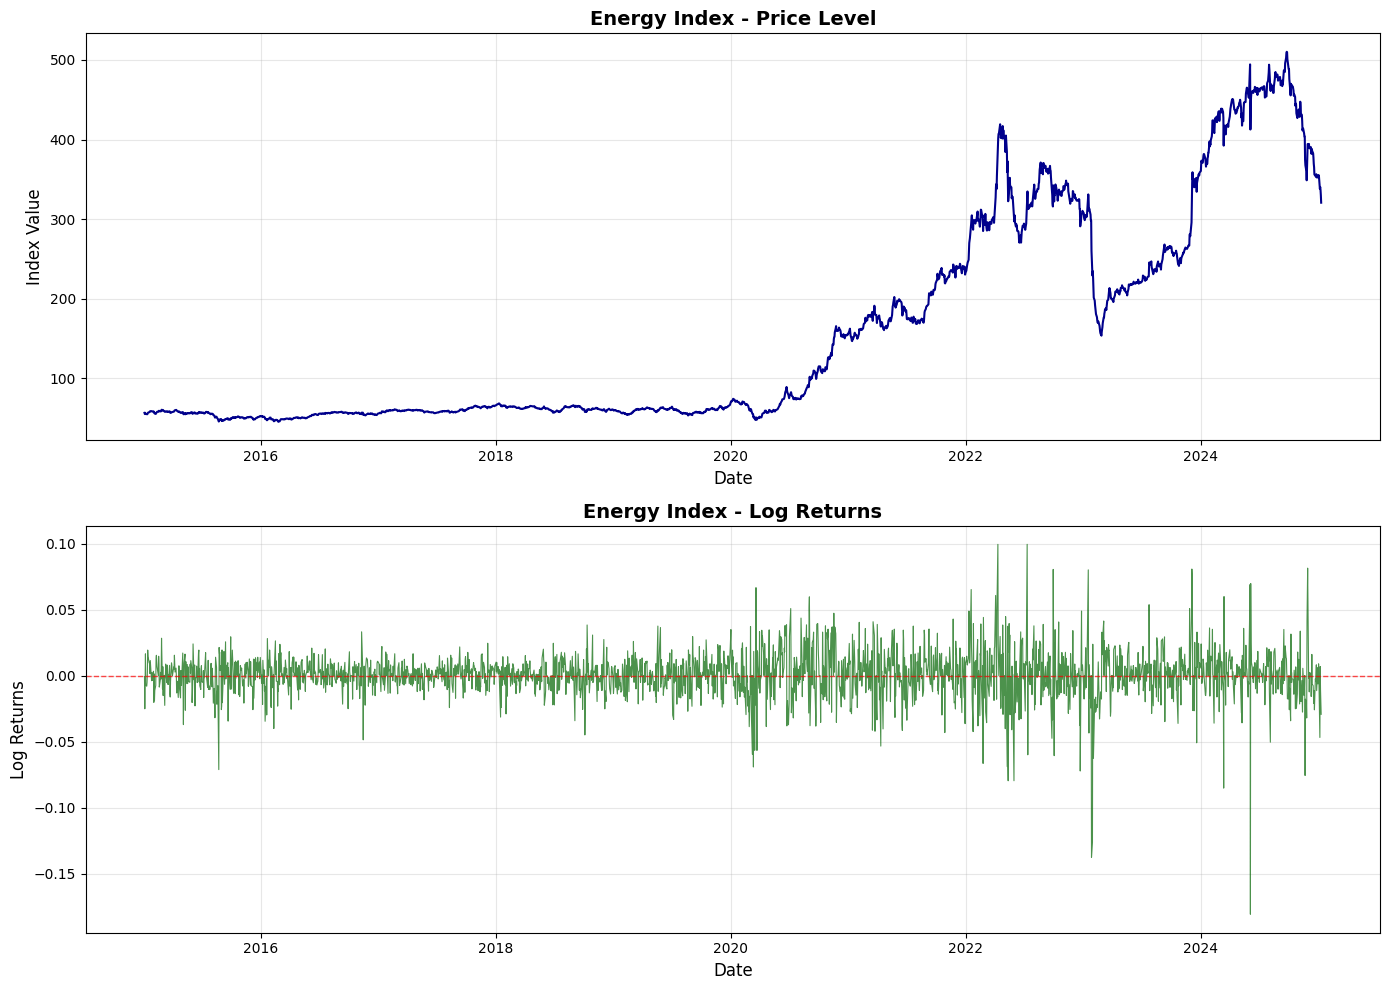

✓ Chart saved as: ACF_PACF_Energy_Index.png


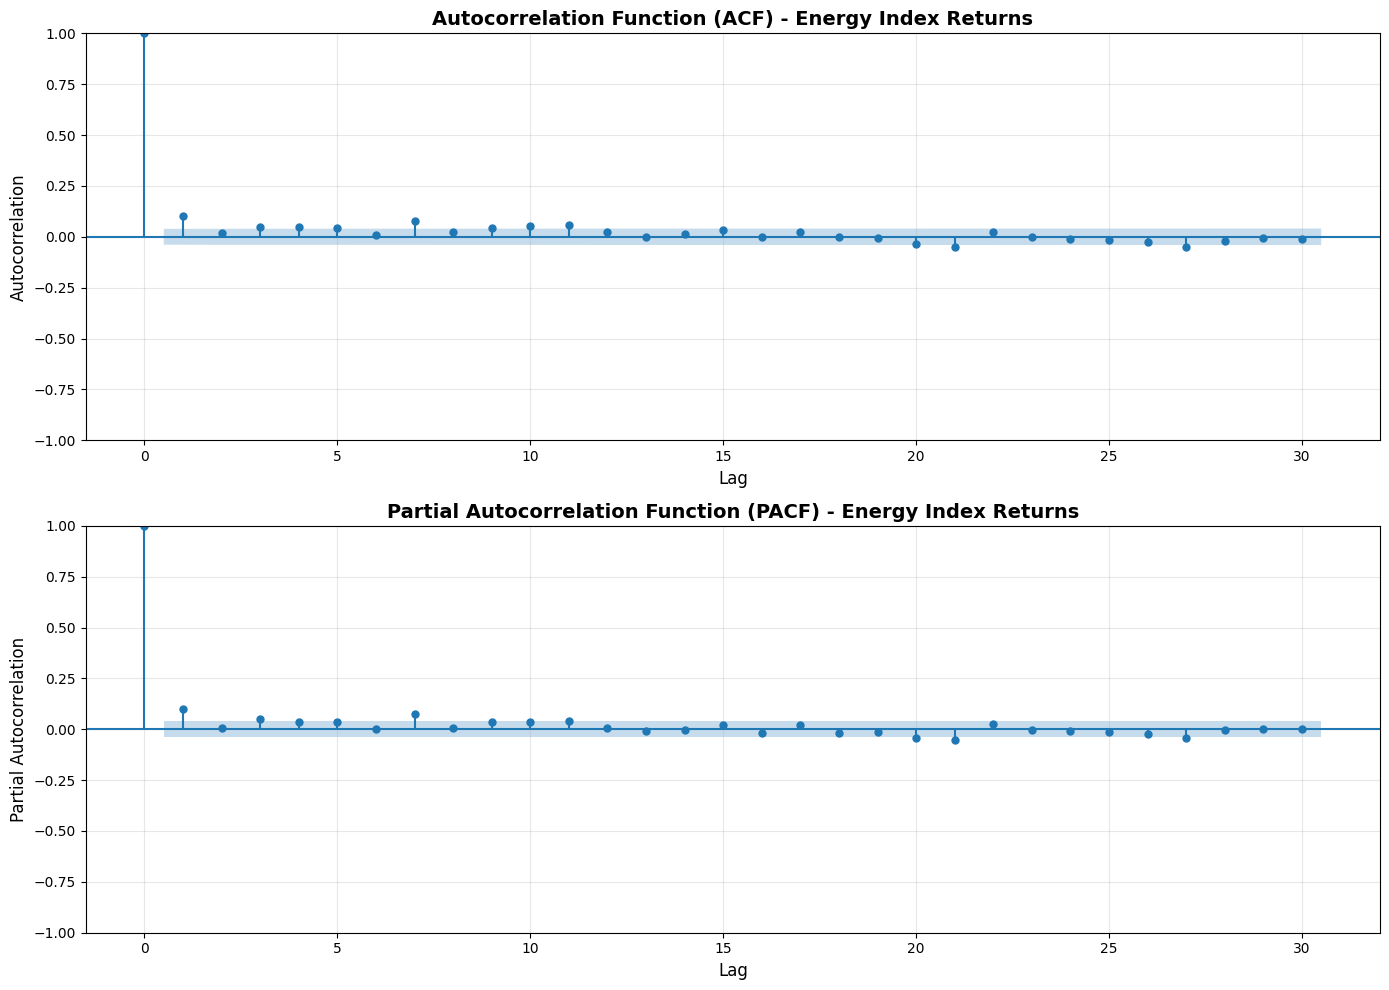

✓ Chart saved as: Energy_Returns_Distribution.png


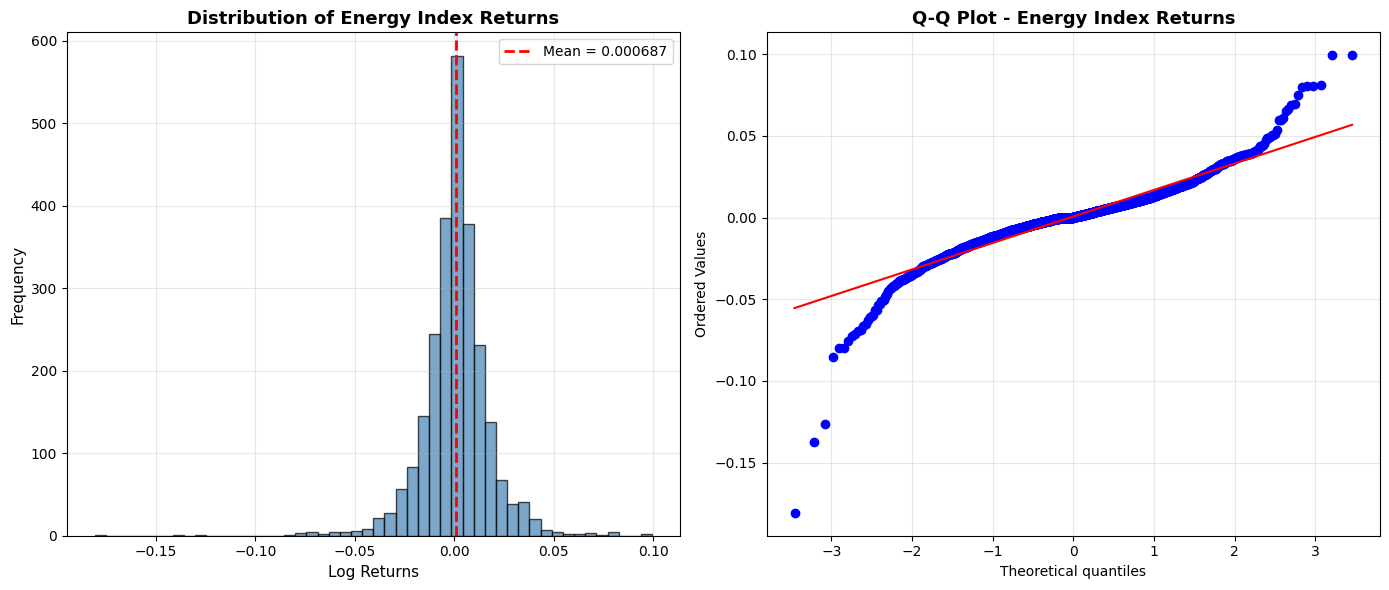

✓ Chart saved as: ACF_PACF_Energy_Index.png


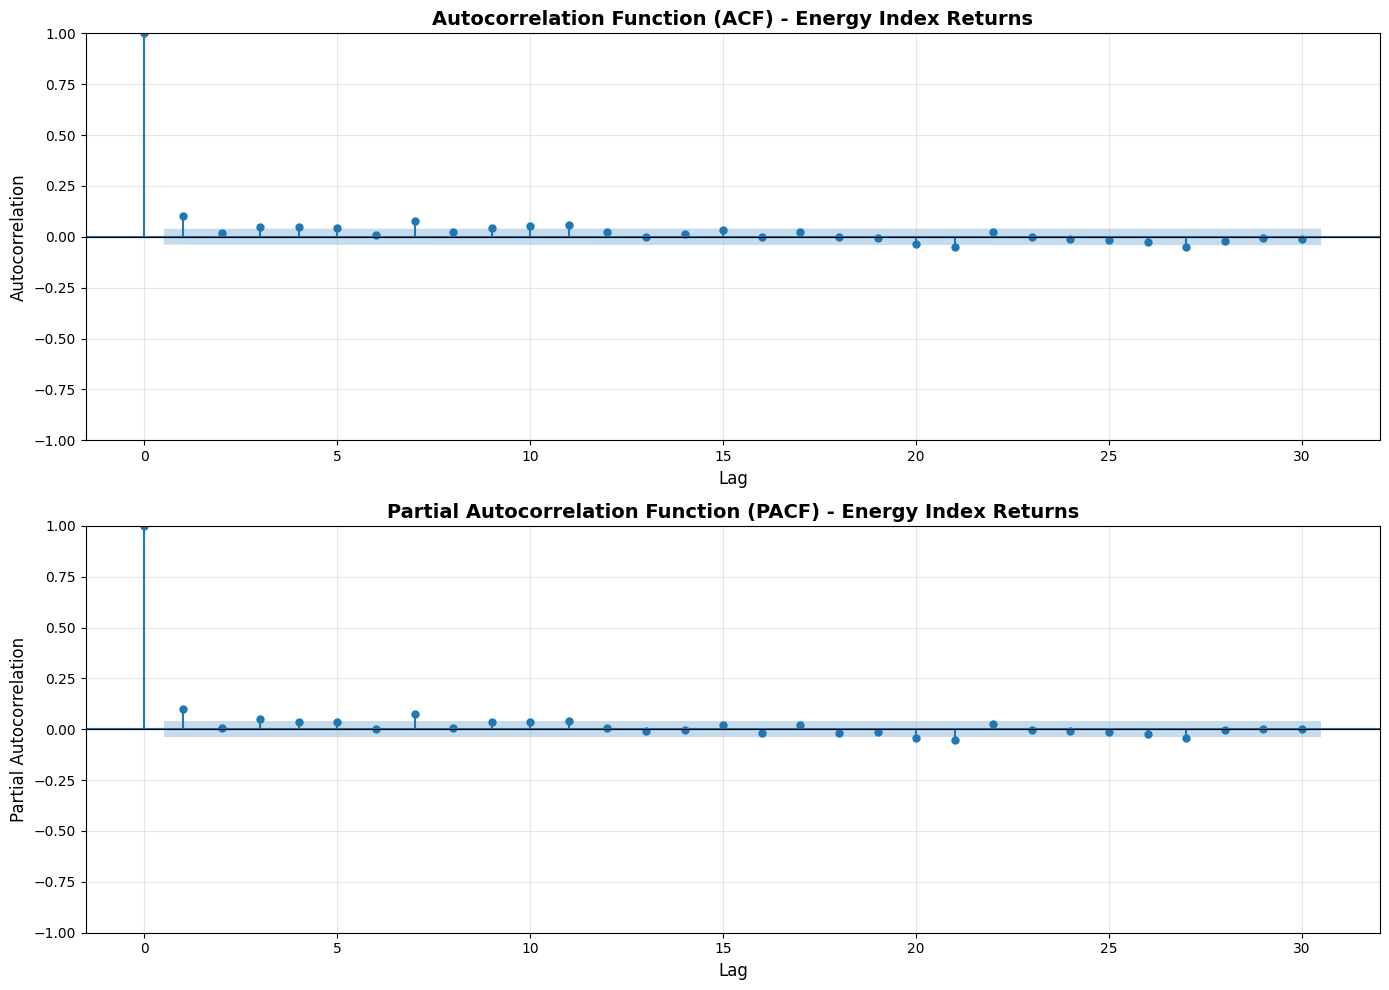

AR MODEL ORDER SUGGESTION

⚠ Significant PACF lags detected: [1, 3, 7, 11, 20, 21, 27]
  PACF cutoff appears after lag: 1
  Suggested AR model order: AR(1)

  Interpretation:
    - Energy returns show autocorrelation at lag(s) [1, 3, 7, 11, 20]
    - Past 1 day(s) returns have predictive power
    - Consider fitting an AR(1) model

  Note: ACF shows 10 significant lags
  This suggests gradual decay, confirming AR process


INTERPRETATION GUIDE

ACF (Autocorrelation Function):
- Measures correlation between a time series and its lagged values
- Significant spikes indicate that past values influence current values
- Gradually declining ACF suggests AR (AutoRegressive) process
- Sharp cutoff after lag q suggests MA(q) (Moving Average) process

PACF (Partial Autocorrelation Function):
- Measures direct correlation at each lag, controlling for shorter lags
- Sharp cutoff after lag p suggests AR(p) process
- Gradually declining PACF suggests MA (Moving Average) process

Model Selection Guide

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

# ----------------------------
# 1. Read and prepare data
# ----------------------------
print("="*100)
print("ACF/PACF ANALYSIS FOR ENERGY INDEX RETURNS")
print("="*100)

df = pd.read_excel("Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx", sheet_name="Daily_Data_With_Index", index_col=0)

# Calculate log returns for Energy Index
df["Energy_Log_Return"] = np.log(df["Energy_Index"] / df["Energy_Index"].shift(1))

# Remove NaN values
df_clean = df[["Energy_Index", "Energy_Log_Return"]].dropna()
print(f"\nSample size: {len(df_clean)} observations")
print(f"Date range: {df_clean.index[0]} to {df_clean.index[-1]}\n")

# ----------------------------
# 2. Descriptive Statistics
# ----------------------------
print("="*100)
print("DESCRIPTIVE STATISTICS OF ENERGY INDEX RETURNS")
print("="*100)

desc_stats = df_clean['Energy_Log_Return'].describe()
print(desc_stats)
print()

# Calculate skewness and kurtosis
skew = stats.skew(df_clean['Energy_Log_Return'])
kurt = stats.kurtosis(df_clean['Energy_Log_Return'])
print("ADDITIONAL STATISTICS:")
print("-"*100)
print(f"Skewness: {skew:.6f}")
print(f"Kurtosis: {kurt:.6f}")
print(f"Interpretation: {'Negatively skewed (left tail)' if skew < 0 else 'Positively skewed (right tail)'}")
print(f"Interpretation: {'Leptokurtic (fat tails)' if kurt > 0 else 'Platykurtic (thin tails)'}")
print()

# ----------------------------
# 3. Augmented Dickey-Fuller Test (Stationarity)
# ----------------------------
print("="*100)
print("AUGMENTED DICKEY-FULLER TEST (Stationarity Test)")
print("="*100)
print("H0: Series has a unit root (non-stationary)")
print("H1: Series is stationary")
print("-"*100)

adf_result = adfuller(df_clean['Energy_Log_Return'], autolag='AIC')
print(f"\nEnergy Index Returns:")
print(f"  ADF Statistic: {adf_result[0]:.6f}")
print(f"  P-value: {adf_result[1]:.6f}")
print(f"  Lags Used: {adf_result[2]}")
print(f"  Number of Observations: {adf_result[3]}")
print(f"  Critical Values:")
for key, value in adf_result[4].items():
    print(f"    {key}: {value:.4f}")

if adf_result[1] < 0.01:
    print(f"\n  Result: STRONGLY STATIONARY ✓✓ (p-value < 0.01)")
elif adf_result[1] < 0.05:
    print(f"\n  Result: STATIONARY ✓ (p-value < 0.05)")
else:
    print(f"\n  Result: NON-STATIONARY ✗ (p-value ≥ 0.05)")
    print(f"  Recommendation: Consider differencing the series")

print()

# ----------------------------
# 4. Ljung-Box Test (Serial Correlation)
# ----------------------------
print("="*100)
print("LJUNG-BOX TEST (Serial Correlation Test)")
print("="*100)
print("H0: No serial correlation in returns up to lag k")
print("H1: Serial correlation exists")
print("-"*100)

lags_to_test = [5, 10, 15, 20, 25, 30]

print(f"\nEnergy Index Returns:")
lb_result = acorr_ljungbox(df_clean['Energy_Log_Return'], lags=lags_to_test, return_df=True)
print(lb_result.to_string())

# Interpretation
significant_lags = lb_result[lb_result['lb_pvalue'] < 0.05]
print(f"\nInterpretation:")
if len(significant_lags) > 0:
    print(f"  ⚠ Serial correlation detected at lags: {list(significant_lags.index)}")
    print(f"  → This suggests past returns can predict future returns (AR model may be appropriate)")
else:
    print(f"  ✓ No significant serial correlation detected")
    print(f"  → Returns appear to be random (efficient market hypothesis holds)")

print()

# ----------------------------
# 5. Calculate ACF and PACF values
# ----------------------------
max_lags = 30

print("="*100)
print(f"ACF VALUES (Lags 0 to {max_lags})")
print("="*100)

acf_values = acf(df_clean['Energy_Log_Return'], nlags=max_lags, fft=False)
acf_df = pd.DataFrame({
    'Lag': range(len(acf_values)),
    'ACF': acf_values
})
acf_df.set_index('Lag', inplace=True)
print(acf_df)
print()

# Calculate confidence interval
n = len(df_clean)
ci_95 = 1.96 / np.sqrt(n)
print(f"95% Confidence Interval: ±{ci_95:.6f}")
print(f"Significant lags (outside CI): {list(acf_df[np.abs(acf_df['ACF']) > ci_95].index[1:])}")  # Exclude lag 0
print()

print("="*100)
print(f"PACF VALUES (Lags 0 to {max_lags})")
print("="*100)

pacf_values = pacf(df_clean['Energy_Log_Return'], nlags=max_lags, method='ywm')
pacf_df = pd.DataFrame({
    'Lag': range(len(pacf_values)),
    'PACF': pacf_values
})
pacf_df.set_index('Lag', inplace=True)
print(pacf_df)
print()

print(f"95% Confidence Interval: ±{ci_95:.6f}")
print(f"Significant lags (outside CI): {list(pacf_df[np.abs(pacf_df['PACF']) > ci_95].index[1:])}")  # Exclude lag 0
print()

# ----------------------------
# 6. Plot Time Series and Returns
# ----------------------------
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Price Series
axes[0].plot(df_clean.index, df_clean['Energy_Index'], linewidth=1.5, color='darkblue')
axes[0].set_title('Energy Index - Price Level', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Index Value', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Returns Series
axes[1].plot(df_clean.index, df_clean['Energy_Log_Return'], linewidth=0.8, color='darkgreen', alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
axes[1].set_title('Energy Index - Log Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Log Returns', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Energy_Index_Price_Returns.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: Energy_Index_Price_Returns.png")
plt.show()

# ----------------------------
# 7. Plot ACF and PACF - Energy Index
# ----------------------------
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# ACF Plot
plot_acf(df_clean['Energy_Log_Return'], lags=max_lags, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation Function (ACF) - Energy Index Returns', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Lag', fontsize=12)
axes[0].set_ylabel('Autocorrelation', fontsize=12)
axes[0].grid(True, alpha=0.3)

# PACF Plot
plot_pacf(df_clean['Energy_Log_Return'], lags=max_lags, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF) - Energy Index Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Lag', fontsize=12)
axes[1].set_ylabel('Partial Autocorrelation', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ACF_PACF_Energy_Index.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: ACF_PACF_Energy_Index.png")
plt.show()

# ----------------------------
# 8. Plot Return Distribution
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axes[0].hist(df_clean['Energy_Log_Return'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].axvline(x=df_clean['Energy_Log_Return'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {df_clean["Energy_Log_Return"].mean():.6f}')
axes[0].set_title('Distribution of Energy Index Returns', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Log Returns', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Q-Q Plot
stats.probplot(df_clean['Energy_Log_Return'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot - Energy Index Returns', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Energy_Returns_Distribution.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: Energy_Returns_Distribution.png")
plt.show()

# ----------------------------
# 9. Plot ACF and PACF with Enhanced Details
# ----------------------------
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# ACF Plot
plot_acf(df_clean['Energy_Log_Return'], lags=max_lags, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation Function (ACF) - Energy Index Returns', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Lag', fontsize=12)
axes[0].set_ylabel('Autocorrelation', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# PACF Plot
plot_pacf(df_clean['Energy_Log_Return'], lags=max_lags, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF) - Energy Index Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Lag', fontsize=12)
axes[1].set_ylabel('Partial Autocorrelation', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.savefig('ACF_PACF_Energy_Index.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: ACF_PACF_Energy_Index.png")
plt.show()

# ----------------------------
# 10. Identify Suggested AR Model Order
# ----------------------------
print("="*100)
print("AR MODEL ORDER SUGGESTION")
print("="*100)

# Find significant PACF lags
significant_pacf_lags = list(pacf_df[np.abs(pacf_df['PACF']) > ci_95].index[1:])  # Exclude lag 0

if len(significant_pacf_lags) == 0:
    print("\n✓ No significant PACF lags detected")
    print("  Recommendation: AR model may not be appropriate (returns are likely white noise)")
    suggested_ar_order = 0
else:
    # Find the cutoff point (first lag after which all are insignificant)
    max_consecutive_significant = 0
    for i in range(1, max_lags + 1):
        if i in significant_pacf_lags:
            max_consecutive_significant = i
        else:
            break

    suggested_ar_order = max_consecutive_significant

    print(f"\n⚠ Significant PACF lags detected: {significant_pacf_lags[:10]}")
    print(f"  PACF cutoff appears after lag: {suggested_ar_order}")
    print(f"  Suggested AR model order: AR({suggested_ar_order})")

    if suggested_ar_order > 0:
        print(f"\n  Interpretation:")
        print(f"    - Energy returns show autocorrelation at lag(s) {significant_pacf_lags[:5]}")
        print(f"    - Past {suggested_ar_order} day(s) returns have predictive power")
        print(f"    - Consider fitting an AR({suggested_ar_order}) model")

# Check ACF pattern
significant_acf_lags = list(acf_df[np.abs(acf_df['ACF']) > ci_95].index[1:])
if len(significant_acf_lags) > 5:
    print(f"\n  Note: ACF shows {len(significant_acf_lags)} significant lags")
    print(f"  This suggests gradual decay, confirming AR process")

print()

# ----------------------------
# 11. Interpretation Summary
# ----------------------------
print("\n" + "="*100)
print("INTERPRETATION GUIDE")
print("="*100)
print("""
ACF (Autocorrelation Function):
- Measures correlation between a time series and its lagged values
- Significant spikes indicate that past values influence current values
- Gradually declining ACF suggests AR (AutoRegressive) process
- Sharp cutoff after lag q suggests MA(q) (Moving Average) process

PACF (Partial Autocorrelation Function):
- Measures direct correlation at each lag, controlling for shorter lags
- Sharp cutoff after lag p suggests AR(p) process
- Gradually declining PACF suggests MA (Moving Average) process

Model Selection Guidelines:
┌─────────────────────────────────────────────────────────────┐
│ ACF Pattern          │ PACF Pattern         │ Model         │
├─────────────────────────────────────────────────────────────┤
│ Gradual decay        │ Sharp cutoff at p    │ AR(p)         │
│ Sharp cutoff at q    │ Gradual decay        │ MA(q)         │
│ Gradual decay        │ Gradual decay        │ ARMA(p,q)     │
│ No significant lags  │ No significant lags  │ White Noise   │
└─────────────────────────────────────────────────────────────┘

Statistical Tests Interpretation:
- ADF test p-value < 0.05: Series is stationary (good for AR modeling)
- Ljung-Box p-value < 0.05: Significant serial correlation exists
- Blue shaded region in plots: 95% confidence interval

Next Steps for AR Modeling:
1. If suggested AR order > 0: Fit AR(p) model using statsmodels
2. If AR order = 0: Returns are likely white noise (efficient market)
3. Consider ARMA or ARIMA if both ACF and PACF decay gradually
4. Use model diagnostics (AIC, BIC) to compare different orders
""")

print("="*100)
print("ANALYSIS COMPLETE!")
print("="*100)
print("\nGenerated Files:")
print("  1. Energy_Index_Price_Returns.png - Time series visualization")
print("  2. Energy_Returns_Distribution.png - Distribution and Q-Q plot")
print("  3. ACF_PACF_Energy_Index.png - Main ACF/PACF plots")

print(f"\nKey Findings:")
print(f"  • Sample size: {len(df_clean)} observations")
print(f"  • Stationarity: {'Yes ✓' if adf_result[1] < 0.05 else 'No ✗'} (ADF p-value: {adf_result[1]:.6f})")
print(f"  • Serial correlation: {'Yes ⚠' if len(significant_lags) > 0 else 'No ✓'}")
print(f"  • Suggested AR order: AR({suggested_ar_order})")

print("\nRecommended Next Steps:")
if suggested_ar_order > 0:
    print(f"  1. Fit AR({suggested_ar_order}) model using statsmodels.tsa.ar_model.AutoReg")
    print(f"  2. Compare with AR models of nearby orders (e.g., AR({suggested_ar_order-1}), AR({suggested_ar_order+1}))")
    print(f"  3. Evaluate models using AIC, BIC criteria")
    print(f"  4. Check residuals for white noise (no remaining autocorrelation)")
    print(f"  5. Use model for forecasting if diagnostics are satisfactory")
else:
    print(f"  • Energy Index returns appear to be white noise")
    print(f"  • AR modeling may not provide significant predictive power")
    print(f"  • Consider alternative approaches (GARCH for volatility, external factors)")

print("="*100)

MA MODEL TEST - ENERGY INDEX RETURNS

Sample size: 2518 observations
Date range: 2015-01-05 00:00:00 to 2025-01-10 00:00:00

FITTING MA MODELS

────────────────────────────────────────────────────────────────────────────────────────────────────
MA(1) MODEL
────────────────────────────────────────────────────────────────────────────────────────────────────
AIC: -13366.0794
BIC: -13348.5858
Log-Likelihood: 6686.0397

Parameters:
  const          :   0.000685
  ma.L1          :   0.100831
  sigma2         :   0.000289

────────────────────────────────────────────────────────────────────────────────────────────────────
MA(2) MODEL
────────────────────────────────────────────────────────────────────────────────────────────────────
AIC: -13364.2383
BIC: -13340.9134
Log-Likelihood: 6686.1191

Parameters:
  const          :   0.000684
  ma.L1          :   0.097977
  ma.L2          :   0.011759
  sigma2         :   0.000289

──────────────────────────────────────────────────────────────────────

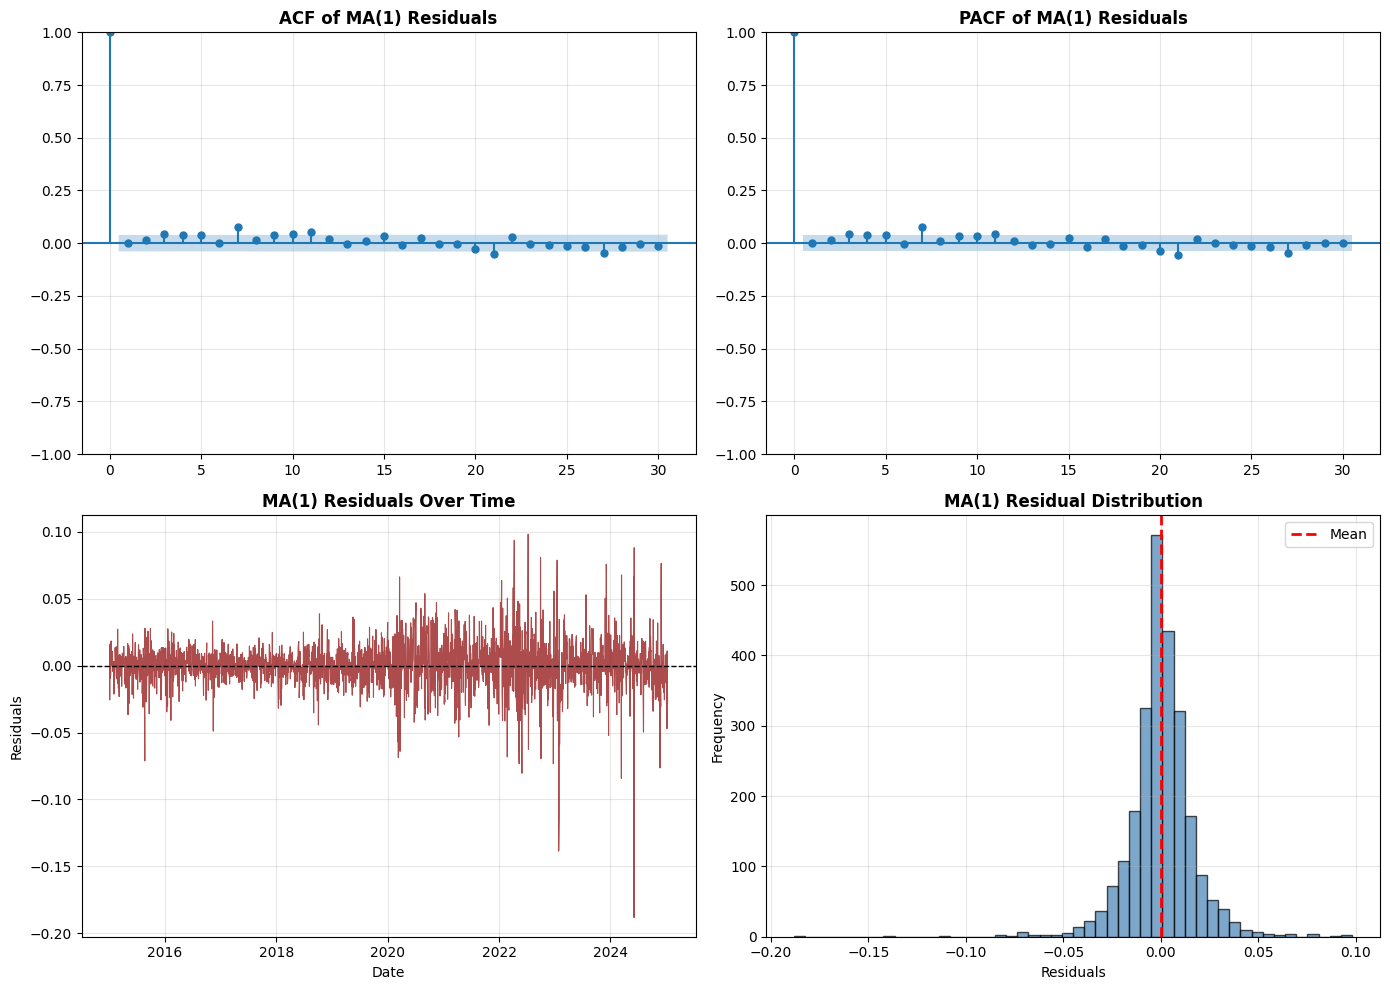

✓ Chart saved as: MA_Model_Comparison.png


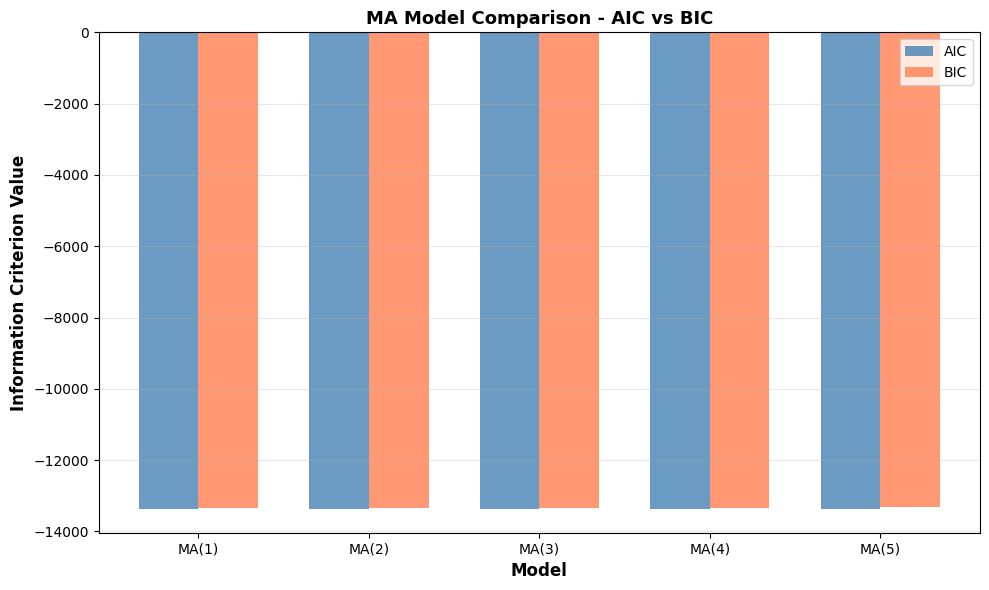


SUMMARY & RECOMMENDATIONS

Best MA Model: MA(1)
Selection Criteria: BIC (penalizes complexity more than AIC)

Model Equation:
  Y_t = μ + ε_t + (0.1008)ε_{t-1}

Interpretation:
  • Energy returns depend on past 1 forecast error(s)
  • Model captures short-term shocks/innovations
  • Lower AIC/BIC indicates better model fit

Next Steps:
  1. Check if residuals are white noise (ACF/PACF plots)
  2. If residuals still show patterns, consider ARMA model
  3. Use model for short-term return forecasting
  4. Compare with AR and ARMA models for best performance


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# 1. Load Data
# ----------------------------
print("="*100)
print("MA MODEL TEST - ENERGY INDEX RETURNS")
print("="*100)

df = pd.read_excel("Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx", sheet_name="Daily_Data_With_Index", index_col=0)
df["Energy_Log_Return"] = np.log(df["Energy_Index"] / df["Energy_Index"].shift(1))
df_clean = df[["Energy_Log_Return"]].dropna()

print(f"\nSample size: {len(df_clean)} observations")
print(f"Date range: {df_clean.index[0]} to {df_clean.index[-1]}\n")

# ----------------------------
# 2. Fit MA Models (MA(1) to MA(5))
# ----------------------------
print("="*100)
print("FITTING MA MODELS")
print("="*100)

ma_orders = [1, 2, 3, 4, 5]
results = []

for q in ma_orders:
    model = ARIMA(df_clean['Energy_Log_Return'], order=(0, 0, q))
    fitted = model.fit()

    results.append({
        'Model': f'MA({q})',
        'AIC': fitted.aic,
        'BIC': fitted.bic,
        'Log-Likelihood': fitted.llf,
        'Params': fitted.params.to_dict()
    })

    print(f"\n{'─'*100}")
    print(f"MA({q}) MODEL")
    print(f"{'─'*100}")
    print(f"AIC: {fitted.aic:.4f}")
    print(f"BIC: {fitted.bic:.4f}")
    print(f"Log-Likelihood: {fitted.llf:.4f}")
    print(f"\nParameters:")
    for param, value in fitted.params.items():
        print(f"  {param:15s}: {value:10.6f}")

# ----------------------------
# 3. Model Comparison
# ----------------------------
print("\n" + "="*100)
print("MODEL COMPARISON TABLE")
print("="*100)

comparison_df = pd.DataFrame([{
    'Model': r['Model'],
    'AIC': f"{r['AIC']:.4f}",
    'BIC': f"{r['BIC']:.4f}",
    'Log-Likelihood': f"{r['Log-Likelihood']:.4f}"
} for r in results])

print(comparison_df.to_string(index=False))

# Find best models
best_aic = min(results, key=lambda x: x['AIC'])
best_bic = min(results, key=lambda x: x['BIC'])

print(f"\n{'Best Model by AIC:':<25} {best_aic['Model']} (AIC = {best_aic['AIC']:.4f})")
print(f"{'Best Model by BIC:':<25} {best_bic['Model']} (BIC = {best_bic['BIC']:.4f})")

# ----------------------------
# 4. Best Model Analysis
# ----------------------------
best_q = int(best_bic['Model'][3])  # Extract order from 'MA(q)'
print(f"\n{'='*100}")
print(f"DETAILED ANALYSIS: {best_bic['Model']} (Selected by BIC)")
print(f"{'='*100}")

best_model = ARIMA(df_clean['Energy_Log_Return'], order=(0, 0, best_q)).fit()
print(best_model.summary())

# Residual diagnostics
residuals = best_model.resid

print(f"\n{'='*100}")
print("RESIDUAL DIAGNOSTICS")
print(f"{'='*100}")
print(f"Mean of residuals: {residuals.mean():.8f}")
print(f"Std of residuals: {residuals.std():.6f}")
print(f"Skewness: {residuals.skew():.4f}")
print(f"Kurtosis: {residuals.kurtosis():.4f}")

# Ljung-Box test on residuals
print(f"\nLjung-Box Test (Residuals should show NO autocorrelation):")
lb_resid = acorr_ljungbox(residuals, lags=[5, 10, 15, 20], return_df=True)
print(lb_resid.to_string())

if (lb_resid['lb_pvalue'] > 0.05).all():
    print("\n✓ Residuals show no significant autocorrelation (good model fit)")
else:
    print("\n⚠ Some autocorrelation remains in residuals (consider higher order)")

# ----------------------------
# 5. Visualizations
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: ACF of residuals
plot_acf(residuals, lags=30, ax=axes[0, 0], alpha=0.05)
axes[0, 0].set_title(f'ACF of {best_bic["Model"]} Residuals', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: PACF of residuals
plot_pacf(residuals, lags=30, ax=axes[0, 1], alpha=0.05)
axes[0, 1].set_title(f'PACF of {best_bic["Model"]} Residuals', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals over time
axes[1, 0].plot(residuals.index, residuals, linewidth=0.8, color='darkred', alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 0].set_title(f'{best_bic["Model"]} Residuals Over Time', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date', fontsize=10)
axes[1, 0].set_ylabel('Residuals', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Residual histogram
axes[1, 1].hist(residuals, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Mean')
axes[1, 1].set_title(f'{best_bic["Model"]} Residual Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Residuals', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('MA_Model_Diagnostics.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Chart saved as: MA_Model_Diagnostics.png")
plt.show()

# ----------------------------
# 6. AIC/BIC Comparison Chart
# ----------------------------
fig, ax = plt.subplots(figsize=(10, 6))

models = [r['Model'] for r in results]
aic_values = [r['AIC'] for r in results]
bic_values = [r['BIC'] for r in results]

x = np.arange(len(models))
width = 0.35

ax.bar(x - width/2, aic_values, width, label='AIC', alpha=0.8, color='steelblue')
ax.bar(x + width/2, bic_values, width, label='BIC', alpha=0.8, color='coral')

ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Information Criterion Value', fontsize=12, fontweight='bold')
ax.set_title('MA Model Comparison - AIC vs BIC', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('MA_Model_Comparison.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: MA_Model_Comparison.png")
plt.show()

# ----------------------------
# 7. Summary
# ----------------------------
print("\n" + "="*100)
print("SUMMARY & RECOMMENDATIONS")
print("="*100)
print(f"\nBest MA Model: {best_bic['Model']}")
print(f"Selection Criteria: BIC (penalizes complexity more than AIC)")
print(f"\nModel Equation:")
print(f"  Y_t = μ + ε_t", end="")
for i in range(1, best_q + 1):
    theta = best_model.params[f'ma.L{i}']
    print(f" + ({theta:.4f})ε_{{t-{i}}}", end="")
print()

print(f"\nInterpretation:")
print(f"  • Energy returns depend on past {best_q} forecast error(s)")
print(f"  • Model captures short-term shocks/innovations")
print(f"  • Lower AIC/BIC indicates better model fit")

print(f"\nNext Steps:")
print(f"  1. Check if residuals are white noise (ACF/PACF plots)")
print(f"  2. If residuals still show patterns, consider ARMA model")
print(f"  3. Use model for short-term return forecasting")
print(f"  4. Compare with AR and ARMA models for best performance")

print("="*100)

STL SEASONALITY DECOMPOSITION - ENERGY INDEX RETURNS
Sample size: 2518 observations
Date range: 2015-01-05 00:00:00 to 2025-01-10 00:00:00

STL DECOMPOSITION - WEEKLY SEASONALITY (Period = 5 days)

Weekly Decomposition Components:
  Trend variance: 0.00005495
  Seasonal variance: 0.00007685
  Residual variance: 0.00010049

Seasonal Strength (Weekly): 0.433358
  Interpretation: Strong seasonality ⚠

STL DECOMPOSITION - MONTHLY SEASONALITY (Period = 20 days)

Monthly Decomposition Components:
  Trend variance: 0.00002472
  Seasonal variance: 0.00001730
  Residual variance: 0.00023395

Seasonal Strength (Monthly): 0.068855
  Interpretation: Weak/No seasonality ✓

✓ Chart saved as: STL_Decomposition_Weekly.png


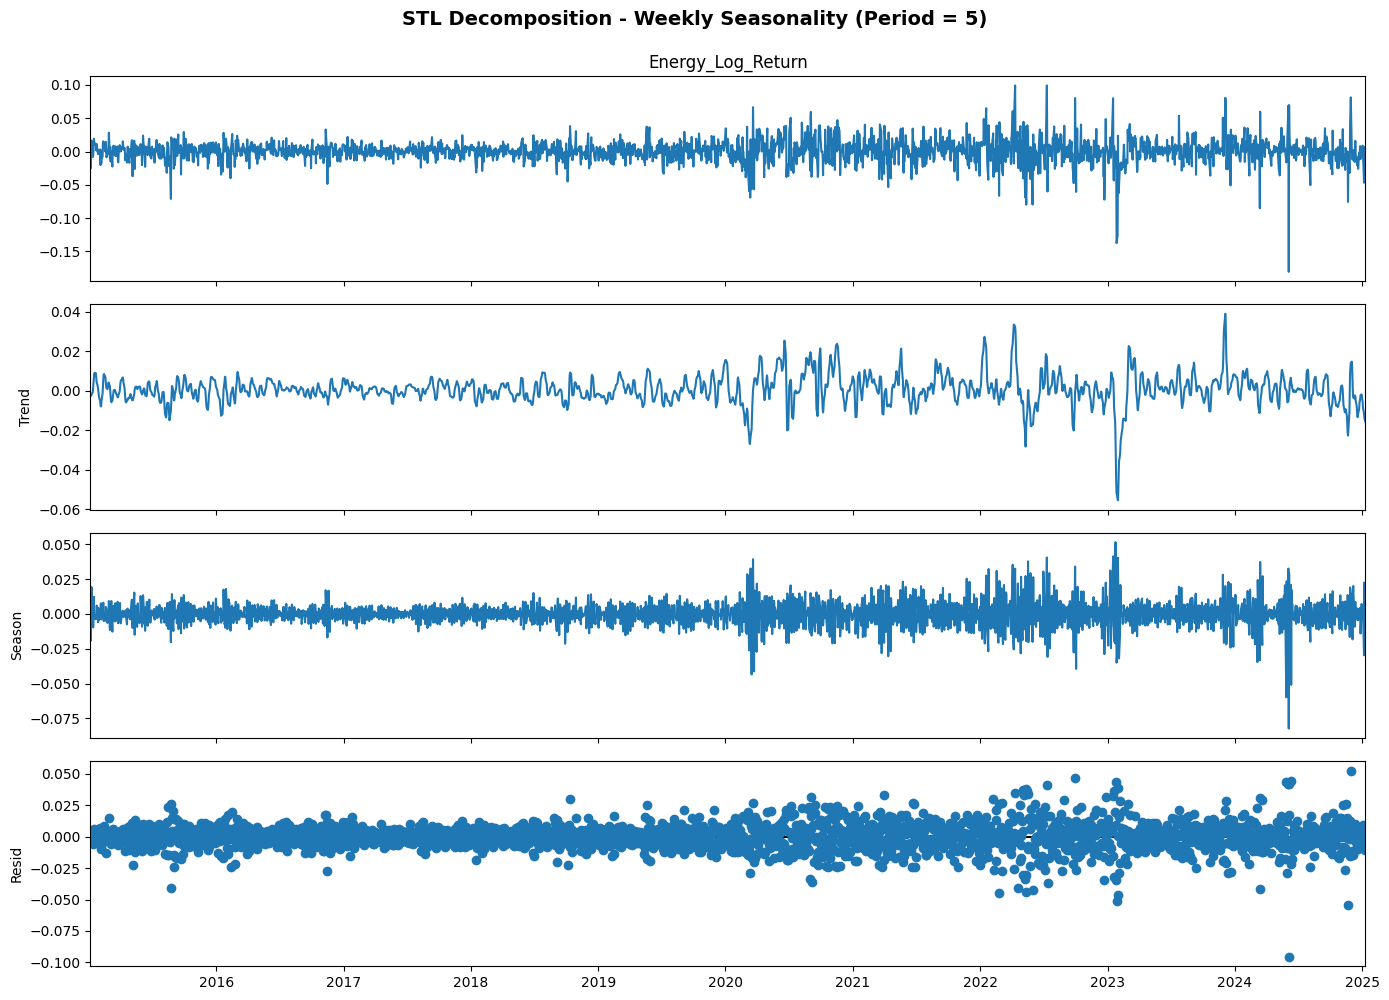

✓ Chart saved as: STL_Decomposition_Monthly.png


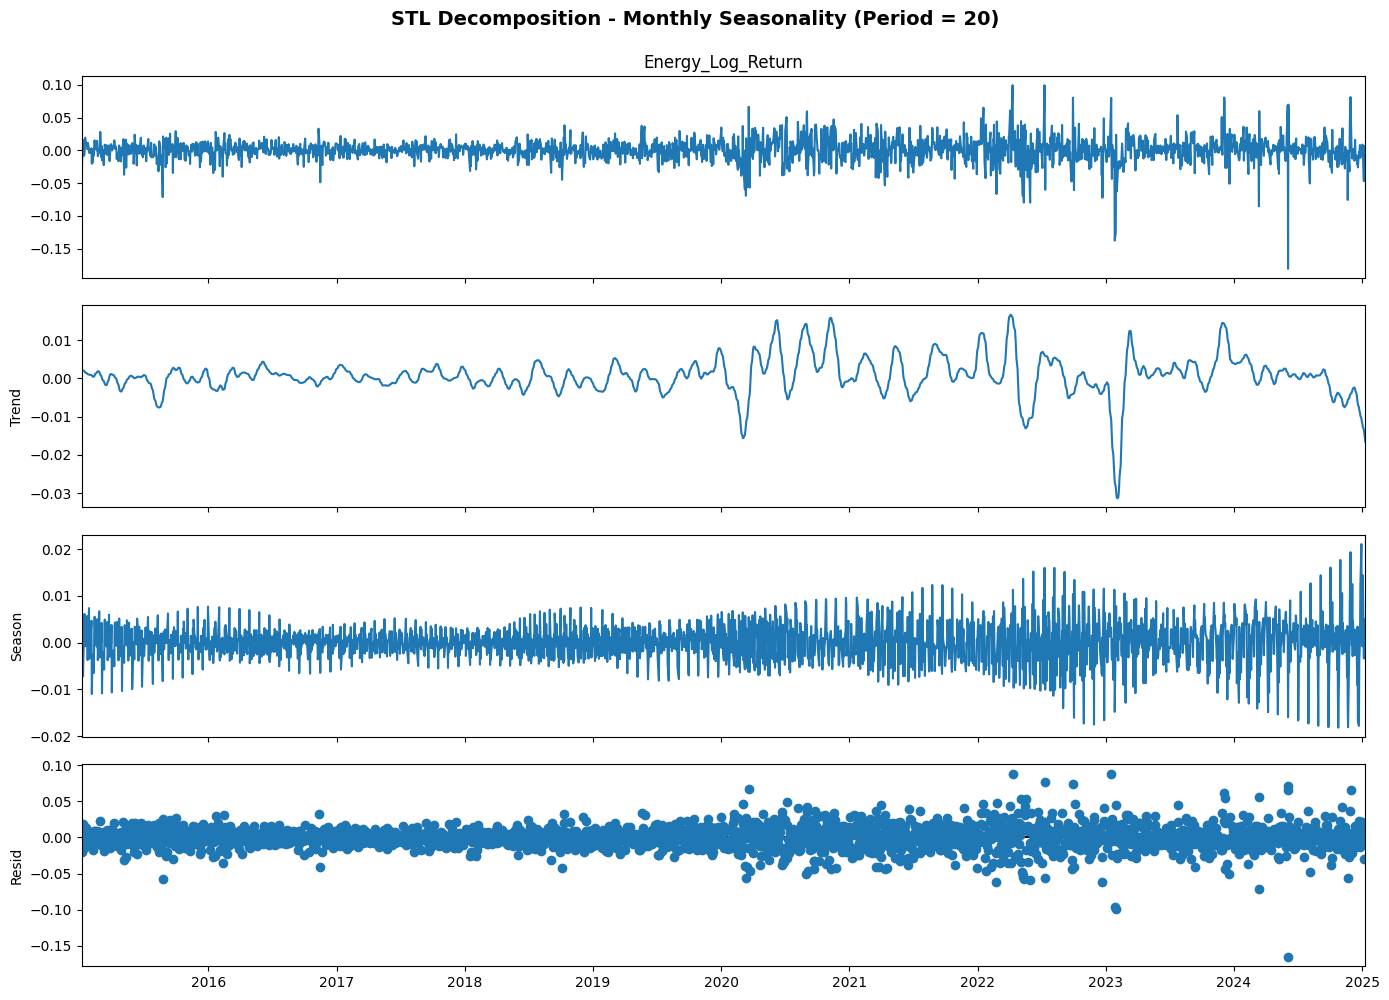

✓ Chart saved as: STL_Seasonal_Analysis.png


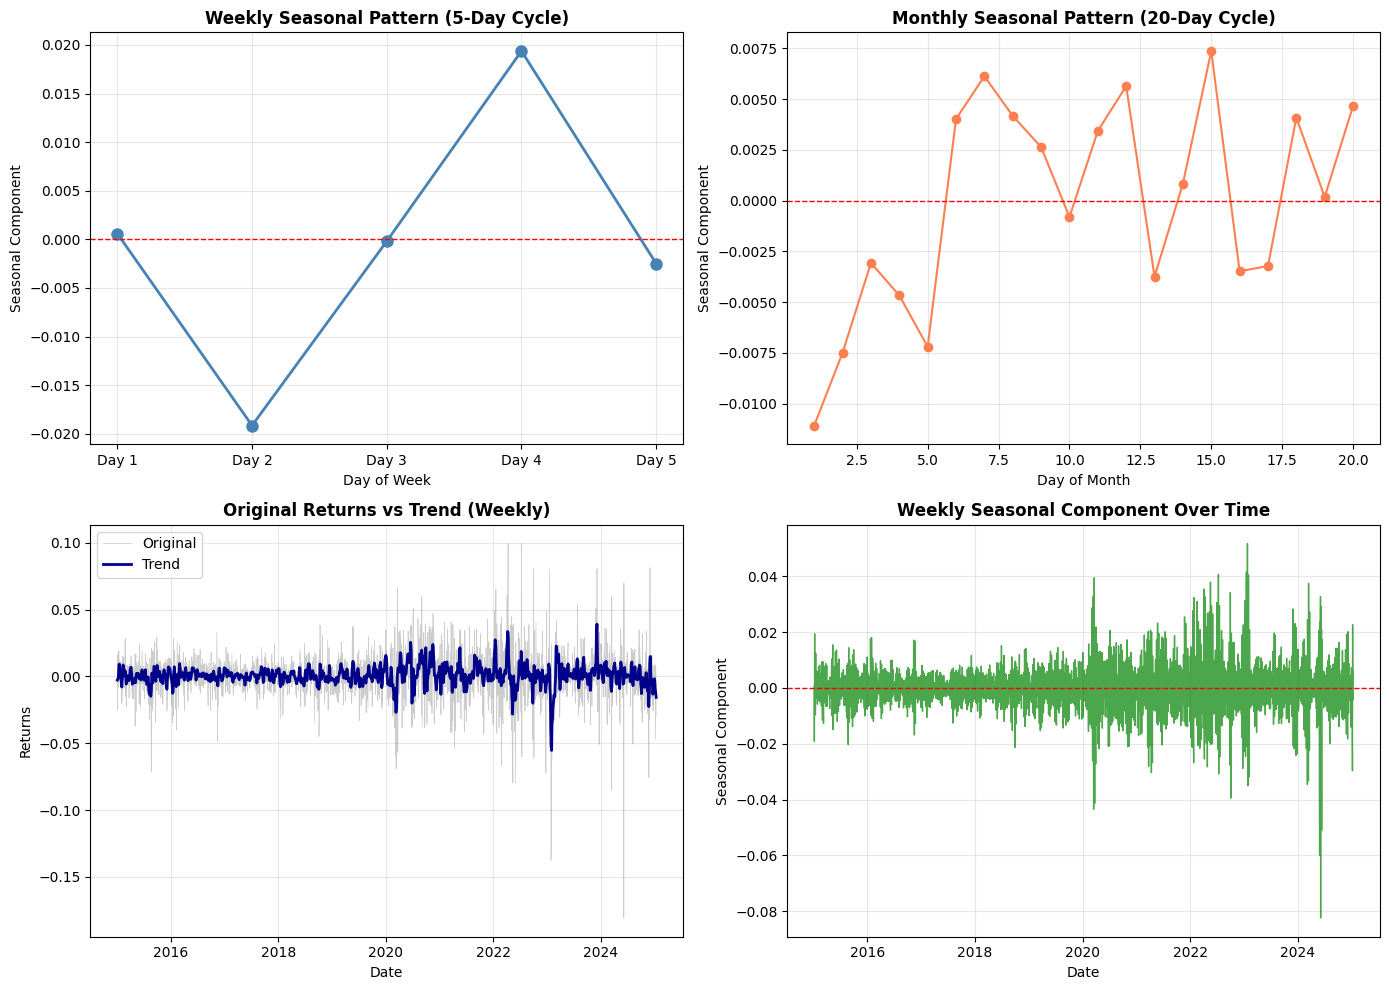


RESIDUAL ANALYSIS (After Removing Trend & Seasonality)

Weekly STL Residuals:
  Mean: -0.00000902
  Std: 0.010024
  Skewness: -0.3464
  Kurtosis: 6.5416

Monthly STL Residuals:
  Mean: 0.00000498
  Std: 0.015296
  Skewness: -0.5281
  Kurtosis: 9.6928

SEASONALITY SUMMARY & RECOMMENDATIONS

Weekly Seasonality (Period = 5):
  Seasonal Strength: 0.4334
  ⚠ STRONG weekly seasonality detected
  → Recommend: SARIMA model with seasonal period = 5
  → Example: SARIMA(1,0,0)(1,0,0)[5]

Monthly Seasonality (Period = 20):
  Seasonal Strength: 0.0689
  ✓ No significant monthly seasonality

Based on your AR lags [1, 3, 7, 11, 20]:
  • Lag 7 aligns with weekly cycle → Confirmed ⚠
  • Lag 20 aligns with monthly cycle → Not confirmed ✓

Next Steps:
  1. If seasonality confirmed: Use SARIMA instead of ARIMA
  2. Model residuals should be white noise (no autocorrelation)
  3. Consider external factors: oil prices, market events


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from scipy import stats
from statsmodels.tsa.stattools import acf
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# 1. Load Data
# ----------------------------
print("="*80)
print("STL SEASONALITY DECOMPOSITION - ENERGY INDEX RETURNS")
print("="*80)

df = pd.read_excel("Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx",
                   sheet_name="Daily_Data_With_Index", index_col=0)
df["Energy_Log_Return"] = np.log(df["Energy_Index"] / df["Energy_Index"].shift(1))
df_clean = df[["Energy_Log_Return"]].dropna()

print(f"Sample size: {len(df_clean)} observations")
print(f"Date range: {df_clean.index[0]} to {df_clean.index[-1]}\n")

# ----------------------------
# 2. STL Decomposition (Weekly Period = 5)
# ----------------------------
print("="*80)
print("STL DECOMPOSITION - WEEKLY SEASONALITY (Period = 5 days)")
print("="*80)

# STL requires period parameter - testing weekly (5 trading days)
stl_weekly = STL(df_clean['Energy_Log_Return'], seasonal=5, period=5)
result_weekly = stl_weekly.fit()

print("\nWeekly Decomposition Components:")
print(f"  Trend variance: {result_weekly.trend.var():.8f}")
print(f"  Seasonal variance: {result_weekly.seasonal.var():.8f}")
print(f"  Residual variance: {result_weekly.resid.var():.8f}")

# Strength of seasonality
seasonal_strength_weekly = 1 - (result_weekly.resid.var() /
                                (result_weekly.seasonal.var() + result_weekly.resid.var()))
print(f"\nSeasonal Strength (Weekly): {seasonal_strength_weekly:.6f}")
print(f"  Interpretation: {'Strong seasonality ⚠' if seasonal_strength_weekly > 0.3 else 'Weak/No seasonality ✓'}")

# ----------------------------
# 3. STL Decomposition (Monthly Period = 20)
# ----------------------------
print("\n" + "="*80)
print("STL DECOMPOSITION - MONTHLY SEASONALITY (Period = 20 days)")
print("="*80)

stl_monthly = STL(df_clean['Energy_Log_Return'], seasonal=21, period=20)
result_monthly = stl_monthly.fit()

print("\nMonthly Decomposition Components:")
print(f"  Trend variance: {result_monthly.trend.var():.8f}")
print(f"  Seasonal variance: {result_monthly.seasonal.var():.8f}")
print(f"  Residual variance: {result_monthly.resid.var():.8f}")

seasonal_strength_monthly = 1 - (result_monthly.resid.var() /
                                 (result_monthly.seasonal.var() + result_monthly.resid.var()))
print(f"\nSeasonal Strength (Monthly): {seasonal_strength_monthly:.6f}")
print(f"  Interpretation: {'Strong seasonality ⚠' if seasonal_strength_monthly > 0.3 else 'Weak/No seasonality ✓'}")

# ----------------------------
# 4. Visualizations - Weekly Decomposition
# ----------------------------
fig = result_weekly.plot()
fig.set_size_inches(14, 10)
fig.suptitle('STL Decomposition - Weekly Seasonality (Period = 5)',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('STL_Decomposition_Weekly.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Chart saved as: STL_Decomposition_Weekly.png")
plt.show()

# ----------------------------
# 5. Visualizations - Monthly Decomposition
# ----------------------------
fig = result_monthly.plot()
fig.set_size_inches(14, 10)
fig.suptitle('STL Decomposition - Monthly Seasonality (Period = 20)',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('STL_Decomposition_Monthly.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: STL_Decomposition_Monthly.png")
plt.show()

# ----------------------------
# 6. Seasonal Component Analysis
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Weekly seasonal pattern
seasonal_weekly_cycle = result_weekly.seasonal[:5]
axes[0, 0].plot(range(1, 6), seasonal_weekly_cycle, marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0, 0].set_title('Weekly Seasonal Pattern (5-Day Cycle)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Day of Week', fontsize=10)
axes[0, 0].set_ylabel('Seasonal Component', fontsize=10)
axes[0, 0].set_xticks(range(1, 6))
axes[0, 0].set_xticklabels(['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])
axes[0, 0].grid(True, alpha=0.3)

# Monthly seasonal pattern
seasonal_monthly_cycle = result_monthly.seasonal[:20]
axes[0, 1].plot(range(1, 21), seasonal_monthly_cycle, marker='o', linewidth=1.5, markersize=6, color='coral')
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0, 1].set_title('Monthly Seasonal Pattern (20-Day Cycle)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Day of Month', fontsize=10)
axes[0, 1].set_ylabel('Seasonal Component', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Detrended data (weekly)
axes[1, 0].plot(df_clean.index, df_clean['Energy_Log_Return'],
                alpha=0.4, linewidth=0.5, label='Original', color='gray')
axes[1, 0].plot(result_weekly.trend.index, result_weekly.trend,
                linewidth=2, label='Trend', color='darkblue')
axes[1, 0].set_title('Original Returns vs Trend (Weekly)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date', fontsize=10)
axes[1, 0].set_ylabel('Returns', fontsize=10)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Seasonal component over time (weekly)
axes[1, 1].plot(result_weekly.seasonal.index, result_weekly.seasonal,
                linewidth=1, color='green', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1, 1].set_title('Weekly Seasonal Component Over Time', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date', fontsize=10)
axes[1, 1].set_ylabel('Seasonal Component', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('STL_Seasonal_Analysis.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: STL_Seasonal_Analysis.png")
plt.show()

# ----------------------------
# 7. Residual Analysis
# ----------------------------
print("\n" + "="*80)
print("RESIDUAL ANALYSIS (After Removing Trend & Seasonality)")
print("="*80)

# Weekly residuals
print("\nWeekly STL Residuals:")
print(f"  Mean: {result_weekly.resid.mean():.8f}")
print(f"  Std: {result_weekly.resid.std():.6f}")
print(f"  Skewness: {result_weekly.resid.skew():.4f}")
print(f"  Kurtosis: {result_weekly.resid.kurtosis():.4f}")

# Monthly residuals
print("\nMonthly STL Residuals:")
print(f"  Mean: {result_monthly.resid.mean():.8f}")
print(f"  Std: {result_monthly.resid.std():.6f}")
print(f"  Skewness: {result_monthly.resid.skew():.4f}")
print(f"  Kurtosis: {result_monthly.resid.kurtosis():.4f}")

# ----------------------------
# 8. Summary & Recommendations
# ----------------------------
print("\n" + "="*80)
print("SEASONALITY SUMMARY & RECOMMENDATIONS")
print("="*80)

print(f"\nWeekly Seasonality (Period = 5):")
print(f"  Seasonal Strength: {seasonal_strength_weekly:.4f}")
if seasonal_strength_weekly > 0.3:
    print(f"  ⚠ STRONG weekly seasonality detected")
    print(f"  → Recommend: SARIMA model with seasonal period = 5")
    print(f"  → Example: SARIMA(1,0,0)(1,0,0)[5]")
elif seasonal_strength_weekly > 0.1:
    print(f"  ⚠ MODERATE weekly seasonality detected")
    print(f"  → Consider: Adding seasonal dummy variables or SAR terms")
else:
    print(f"  ✓ No significant weekly seasonality")

print(f"\nMonthly Seasonality (Period = 20):")
print(f"  Seasonal Strength: {seasonal_strength_monthly:.4f}")
if seasonal_strength_monthly > 0.3:
    print(f"  ⚠ STRONG monthly seasonality detected")
    print(f"  → Recommend: SARIMA model with seasonal period = 20")
    print(f"  → Example: SARIMA(1,0,0)(1,0,0)[20]")
elif seasonal_strength_monthly > 0.1:
    print(f"  ⚠ MODERATE monthly seasonality detected")
    print(f"  → Consider: Adding monthly dummy variables")
else:
    print(f"  ✓ No significant monthly seasonality")

print(f"\nBased on your AR lags [1, 3, 7, 11, 20]:")
print(f"  • Lag 7 aligns with weekly cycle → {'Confirmed ⚠' if seasonal_strength_weekly > 0.1 else 'Not confirmed ✓'}")
print(f"  • Lag 20 aligns with monthly cycle → {'Confirmed ⚠' if seasonal_strength_monthly > 0.1 else 'Not confirmed ✓'}")

print(f"\nNext Steps:")
print(f"  1. If seasonality confirmed: Use SARIMA instead of ARIMA")
print(f"  2. Model residuals should be white noise (no autocorrelation)")
print(f"  3. Consider external factors: oil prices, market events")

print("="*80)

SARIMA(1,0,1)(1,0,1)[5] FORECAST - CRUDE OIL RETURNS

Total observations: 2518
Training set: 2014 observations
Test set: 504 observations

FITTING SARIMA MODEL
Model: SARIMA(1,0,1)(1,0,1)[5]
  AR(1): Autoregressive order = 1
  MA(1): Moving average order = 1
  Seasonal AR(1), MA(1) with period = 5 days

                                     SARIMAX Results                                     
Dep. Variable:                  Crude_Log_Return   No. Observations:                 2014
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 5)   Log Likelihood                4366.792
Date:                           Sun, 23 Nov 2025   AIC                          -8723.583
Time:                                   10:07:45   BIC                          -8695.561
Sample:                                        0   HQIC                         -8713.296
                                          - 2014                                         
Covariance Type:                             opg                 

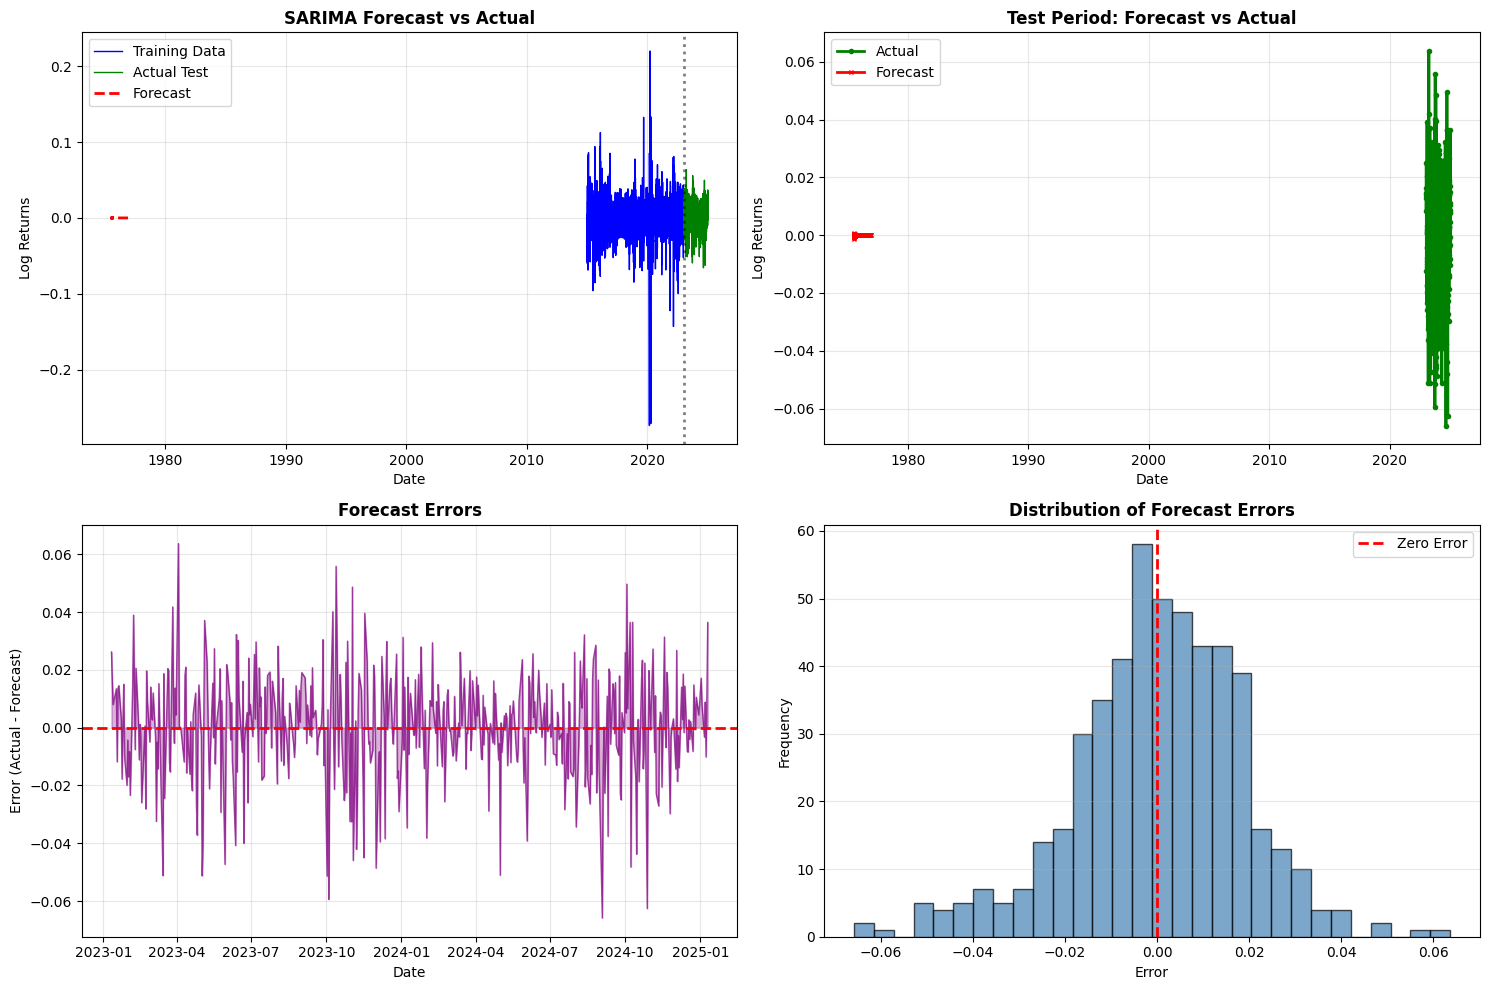


RESIDUAL DIAGNOSTICS
Mean of residuals: 0.00034193
Std of residuals: 0.027547
✓ Chart saved as: SARIMA_Residual_Diagnostics.png


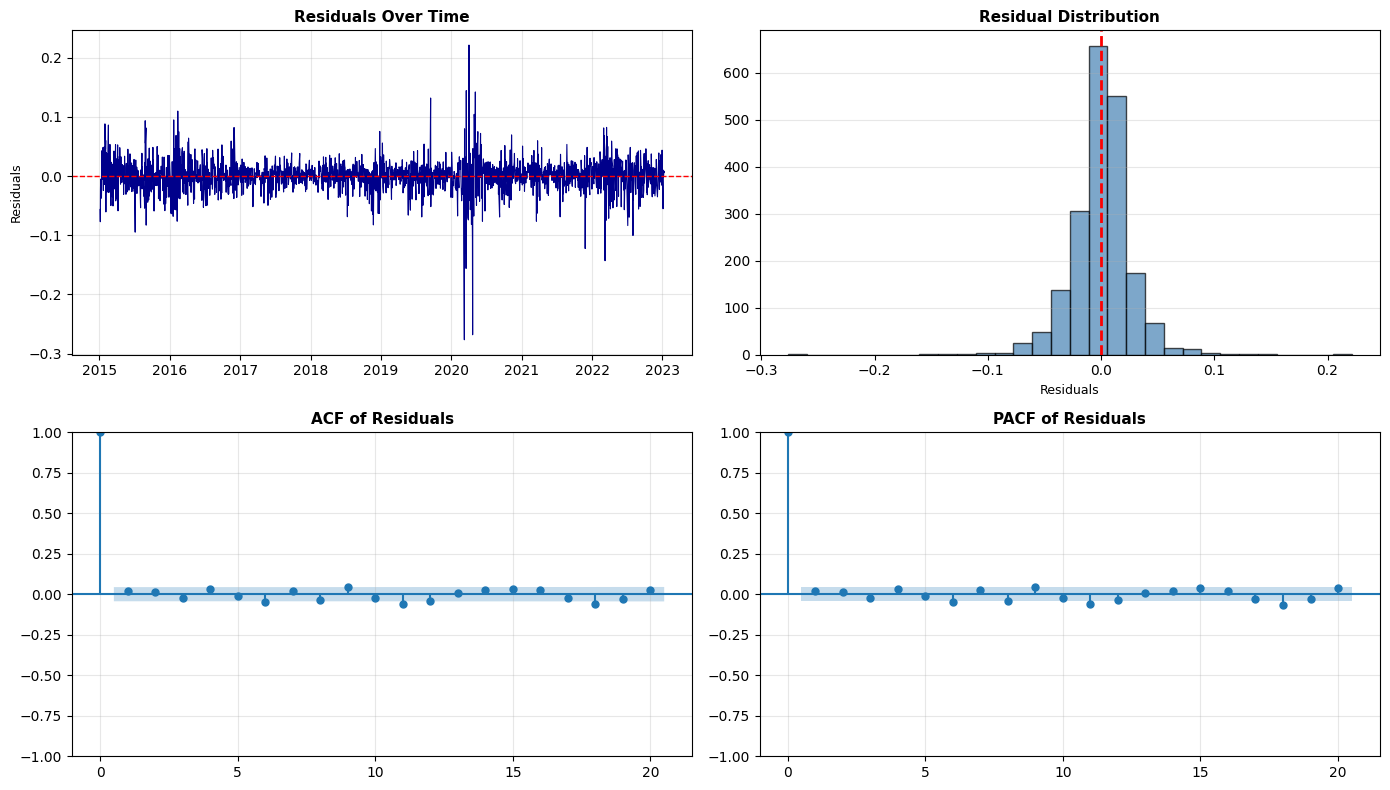


FORECAST SUMMARY

Model: SARIMA(1,0,1)(1,0,1)[5]
  - Captures AR(1) and MA(1) in non-seasonal component
  - Captures seasonal patterns with 5-day period

Performance:
  MAE: 0.014102
  RMSE: 0.018468
  MAPE: 100.07%

Interpretation:
  ✗ Poor forecast accuracy (MAPE ≥ 30%)
  → Consider: Different model orders, external variables


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# 1. Load Data
# ----------------------------
print("="*80)
print("SARIMA(1,0,1)(1,0,1)[5] FORECAST - CRUDE OIL RETURNS")
print("="*80)

df = pd.read_excel("Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx",
                   sheet_name="Daily_Data_With_Index", index_col=0)
df["Crude_Log_Return"] = np.log(df["Crude_INR"] / df["Crude_INR"].shift(1))
df_clean = df[["Crude_Log_Return"]].dropna()

print(f"\nTotal observations: {len(df_clean)}")

# Train-test split (80-20)
train_size = int(len(df_clean) * 0.8)
train = df_clean[:train_size]
test = df_clean[train_size:]

print(f"Training set: {len(train)} observations")
print(f"Test set: {len(test)} observations\n")

# ----------------------------
# 2. Fit SARIMA Model
# ----------------------------
print("="*80)
print("FITTING SARIMA MODEL")
print("="*80)
print("Model: SARIMA(1,0,1)(1,0,1)[5]")
print("  AR(1): Autoregressive order = 1")
print("  MA(1): Moving average order = 1")
print("  Seasonal AR(1), MA(1) with period = 5 days\n")

# SARIMA: order=(p,d,q), seasonal_order=(P,D,Q,s)
model = SARIMAX(train['Crude_Log_Return'],
                order=(1, 0, 1),
                seasonal_order=(1, 0, 1, 5),
                enforce_stationarity=False,
                enforce_invertibility=False)

fitted_model = model.fit(disp=False)
print(fitted_model.summary())

# ----------------------------
# 3. Forecast
# ----------------------------
print("\n" + "="*80)
print("FORECASTING")
print("="*80)

# Forecast for test period
forecast = fitted_model.forecast(steps=len(test))
forecast_df = pd.DataFrame({
    'Date': test.index,
    'Actual': test['Crude_Log_Return'].values,
    'Forecast': forecast.values
})
forecast_df.set_index('Date', inplace=True)

# Calculate errors
forecast_df['Error'] = forecast_df['Actual'] - forecast_df['Forecast']
forecast_df['Abs_Error'] = np.abs(forecast_df['Error'])
forecast_df['Squared_Error'] = forecast_df['Error']**2

# Metrics
mae = forecast_df['Abs_Error'].mean()
rmse = np.sqrt(forecast_df['Squared_Error'].mean())
mape = (forecast_df['Abs_Error'] / np.abs(forecast_df['Actual'])).mean() * 100

print(f"\nForecast Performance Metrics:")
print(f"  MAE (Mean Absolute Error): {mae:.6f}")
print(f"  RMSE (Root Mean Squared Error): {rmse:.6f}")
print(f"  MAPE (Mean Absolute % Error): {mape:.2f}%")

print(f"\nFirst 10 Forecasts:")
print(forecast_df[['Actual', 'Forecast', 'Error']].head(10))

# ----------------------------
# 4. Visualizations
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Train + Test + Forecast
axes[0, 0].plot(train.index, train['Crude_Log_Return'],
                label='Training Data', color='blue', linewidth=1)
axes[0, 0].plot(test.index, test['Crude_Log_Return'],
                label='Actual Test', color='green', linewidth=1)
axes[0, 0].plot(forecast.index, forecast,
                label='Forecast', color='red', linewidth=2, linestyle='--')
axes[0, 0].axvline(x=test.index[0], color='black', linestyle=':', linewidth=2, alpha=0.5)
axes[0, 0].set_title('SARIMA Forecast vs Actual', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date', fontsize=10)
axes[0, 0].set_ylabel('Log Returns', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Forecast vs Actual (Test Period Only)
axes[0, 1].plot(test.index, test['Crude_Log_Return'],
                label='Actual', color='green', linewidth=2, marker='o', markersize=3)
axes[0, 1].plot(forecast.index, forecast,
                label='Forecast', color='red', linewidth=2, marker='x', markersize=3)
axes[0, 1].set_title('Test Period: Forecast vs Actual', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date', fontsize=10)
axes[0, 1].set_ylabel('Log Returns', fontsize=10)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Forecast Errors
axes[1, 0].plot(forecast_df.index, forecast_df['Error'],
                color='purple', linewidth=1, alpha=0.7)
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].fill_between(forecast_df.index, forecast_df['Error'], 0,
                        alpha=0.3, color='purple')
axes[1, 0].set_title('Forecast Errors', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date', fontsize=10)
axes[1, 0].set_ylabel('Error (Actual - Forecast)', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Error Distribution
axes[1, 1].hist(forecast_df['Error'], bins=30, alpha=0.7,
                color='steelblue', edgecolor='black')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1, 1].set_title('Distribution of Forecast Errors', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Error', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('SARIMA_Forecast_Analysis.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Chart saved as: SARIMA_Forecast_Analysis.png")
plt.show()

# ----------------------------
# 5. Residual Diagnostics
# ----------------------------
print("\n" + "="*80)
print("RESIDUAL DIAGNOSTICS")
print("="*80)

residuals = fitted_model.resid
print(f"Mean of residuals: {residuals.mean():.8f}")
print(f"Std of residuals: {residuals.std():.6f}")

# Plot residuals
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Residuals over time
axes[0, 0].plot(residuals, linewidth=0.8, color='darkblue')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0, 0].set_title('Residuals Over Time', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Residuals', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# Residual histogram
axes[0, 1].hist(residuals, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Residual Distribution', fontsize=11, fontweight='bold')
axes[0, 1].set_xlabel('Residuals', fontsize=9)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# ACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=20, ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title('ACF of Residuals', fontsize=11, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# PACF of residuals
plot_pacf(residuals, lags=20, ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('PACF of Residuals', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('SARIMA_Residual_Diagnostics.png', dpi=300, bbox_inches='tight')
print(f"✓ Chart saved as: SARIMA_Residual_Diagnostics.png")
plt.show()

# ----------------------------
# 6. Summary
# ----------------------------
print("\n" + "="*80)
print("FORECAST SUMMARY")
print("="*80)
print(f"\nModel: SARIMA(1,0,1)(1,0,1)[5]")
print(f"  - Captures AR(1) and MA(1) in non-seasonal component")
print(f"  - Captures seasonal patterns with 5-day period")
print(f"\nPerformance:")
print(f"  MAE: {mae:.6f}")
print(f"  RMSE: {rmse:.6f}")
print(f"  MAPE: {mape:.2f}%")
print(f"\nInterpretation:")
if mape < 10:
    print(f"  ✓ Excellent forecast accuracy (MAPE < 10%)")
elif mape < 20:
    print(f"  ✓ Good forecast accuracy (MAPE < 20%)")
elif mape < 30:
    print(f"  ⚠ Moderate forecast accuracy (MAPE < 30%)")
else:
    print(f"  ✗ Poor forecast accuracy (MAPE ≥ 30%)")
    print(f"  → Consider: Different model orders, external variables")

print("="*80)

AR/MA MODEL SELECTION - CRUDE OIL PRICE

Sample size: 2519 observations

Augmented Dickey-Fuller Test:
  ADF Statistic: -0.8313
  P-value: 0.809763
  Result: Non-stationary ✗
  → Need differencing (use ARIMA with d=1)

✓ Chart saved as: Price_ACF_PACF.png



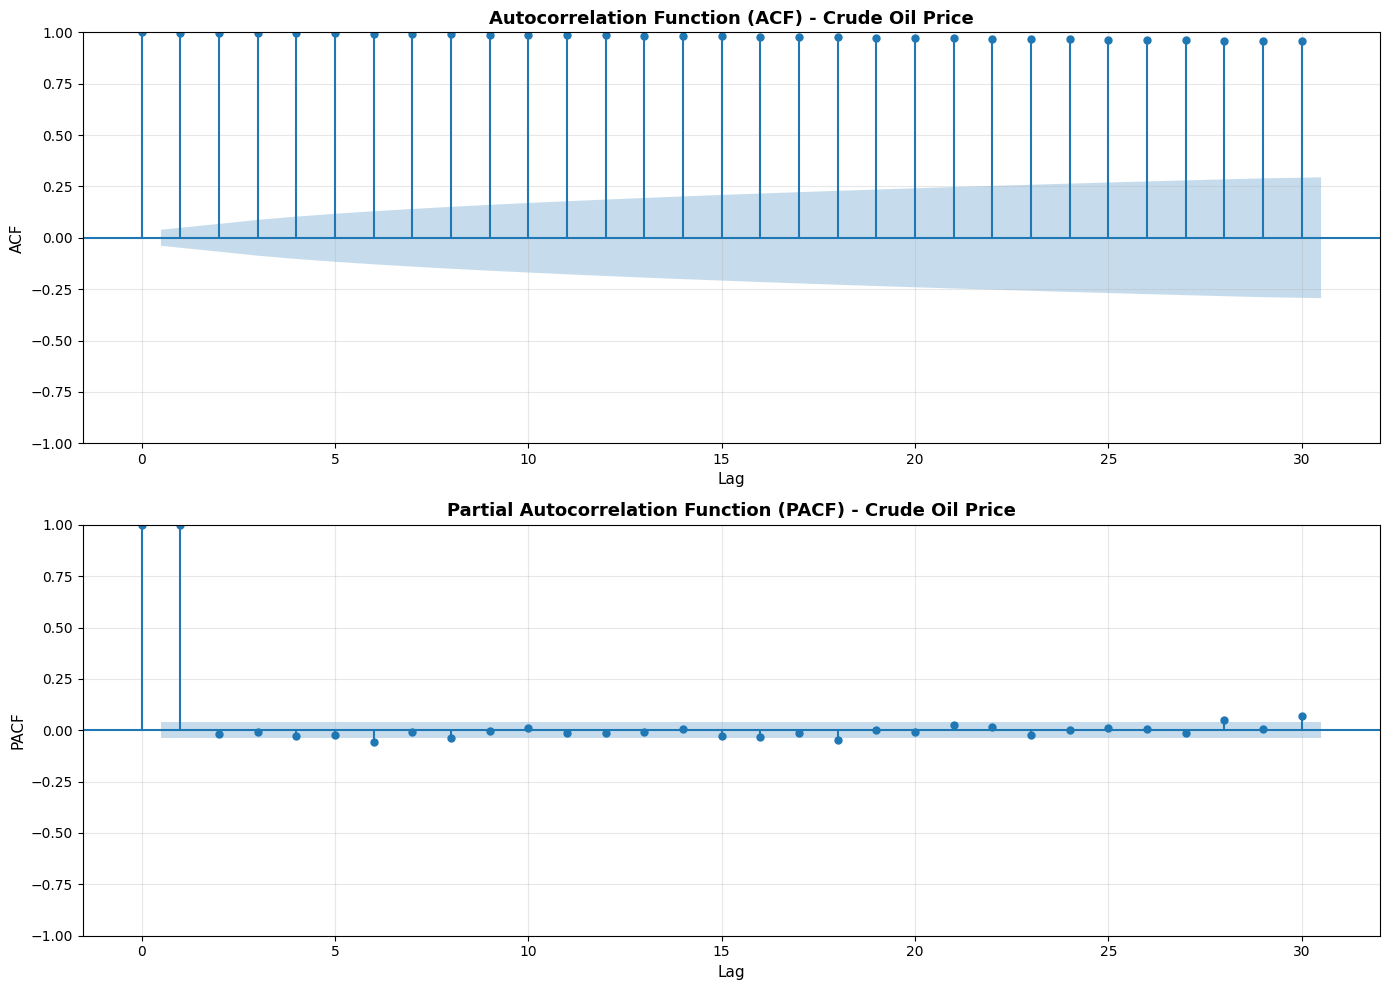

AR MODEL COMPARISON
AR(1): AIC = 14777.63, BIC = 14795.12
AR(2): AIC = 14779.62, BIC = 14802.95
AR(3): AIC = 14781.38, BIC = 14810.53
AR(4): AIC = 14779.88, BIC = 14814.87
AR(5): AIC = 14776.35, BIC = 14817.17

Best AR by AIC: AR(5)
Best AR by BIC: AR(1)

MA MODEL COMPARISON
MA(1): AIC = 28388.11, BIC = 28405.61
MA(2): AIC = 25560.22, BIC = 25583.55
MA(3): AIC = 23382.49, BIC = 23411.65
MA(4): AIC = 21861.04, BIC = 21896.03
MA(5): AIC = 22632.27, BIC = 22673.09

Best MA by AIC: MA(4)
Best MA by BIC: MA(4)

ARMA MODEL COMPARISON
ARMA(1,1): AIC = 14779.62, BIC = 14802.94
ARMA(1,2): AIC = 14781.40, BIC = 14810.56
ARMA(1,3): AIC = 14779.81, BIC = 14814.80
ARMA(2,1): AIC = 14778.09, BIC = 14807.25
ARMA(2,2): AIC = 14771.38, BIC = 14806.37
ARMA(2,3): AIC = 14763.91, BIC = 14804.73
ARMA(3,1): AIC = 14782.81, BIC = 14817.80
ARMA(3,2): AIC = 14771.54, BIC = 14812.36
ARMA(3,3): AIC = 14775.51, BIC = 14822.17

Best ARMA by AIC: ARMA(2,3)
Best ARMA by BIC: ARMA(1,1)

OVERALL BEST MODELS

Best Mode

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

# Load Data
df = pd.read_excel("Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx",
                   sheet_name="Daily_Data_With_Index", index_col=0)
price = df["Energy_Index"].dropna()

print("="*80)
print("AR/MA MODEL SELECTION - CRUDE OIL PRICE")
print("="*80)
print(f"\nSample size: {len(price)} observations\n")

# Stationarity Test
adf_result = adfuller(price, autolag='AIC')
print("Augmented Dickey-Fuller Test:")
print(f"  ADF Statistic: {adf_result[0]:.4f}")
print(f"  P-value: {adf_result[1]:.6f}")
print(f"  Result: {'Stationary ✓' if adf_result[1] < 0.05 else 'Non-stationary ✗'}")
print(f"  → {'Can use AR/MA directly' if adf_result[1] < 0.05 else 'Need differencing (use ARIMA with d=1)'}\n")

# ACF and PACF Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

plot_acf(price, lags=30, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation Function (ACF) - Crude Oil Price', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Lag', fontsize=11)
axes[0].set_ylabel('ACF', fontsize=11)
axes[0].grid(True, alpha=0.3)

plot_pacf(price, lags=30, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF) - Crude Oil Price', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Lag', fontsize=11)
axes[1].set_ylabel('PACF', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Price_ACF_PACF.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as: Price_ACF_PACF.png\n")
plt.show()

# Test AR Models
print("="*80)
print("AR MODEL COMPARISON")
print("="*80)

ar_results = []
for p in range(1, 6):
    model = ARIMA(price, order=(p, 0, 0))
    fitted = model.fit()
    ar_results.append({
        'Model': f'AR({p})',
        'AIC': fitted.aic,
        'BIC': fitted.bic
    })
    print(f"AR({p}): AIC = {fitted.aic:.2f}, BIC = {fitted.bic:.2f}")

best_ar_aic = min(ar_results, key=lambda x: x['AIC'])
best_ar_bic = min(ar_results, key=lambda x: x['BIC'])
print(f"\nBest AR by AIC: {best_ar_aic['Model']}")
print(f"Best AR by BIC: {best_ar_bic['Model']}")

# Test MA Models
print("\n" + "="*80)
print("MA MODEL COMPARISON")
print("="*80)

ma_results = []
for q in range(1, 6):
    model = ARIMA(price, order=(0, 0, q))
    fitted = model.fit()
    ma_results.append({
        'Model': f'MA({q})',
        'AIC': fitted.aic,
        'BIC': fitted.bic
    })
    print(f"MA({q}): AIC = {fitted.aic:.2f}, BIC = {fitted.bic:.2f}")

best_ma_aic = min(ma_results, key=lambda x: x['AIC'])
best_ma_bic = min(ma_results, key=lambda x: x['BIC'])
print(f"\nBest MA by AIC: {best_ma_aic['Model']}")
print(f"Best MA by BIC: {best_ma_bic['Model']}")

# Test ARMA Models
print("\n" + "="*80)
print("ARMA MODEL COMPARISON")
print("="*80)

arma_results = []
for p in range(1, 4):
    for q in range(1, 4):
        try:
            model = ARIMA(price, order=(p, 0, q))
            fitted = model.fit()
            arma_results.append({
                'Model': f'ARMA({p},{q})',
                'AIC': fitted.aic,
                'BIC': fitted.bic
            })
            print(f"ARMA({p},{q}): AIC = {fitted.aic:.2f}, BIC = {fitted.bic:.2f}")
        except:
            continue

best_arma_aic = min(arma_results, key=lambda x: x['AIC'])
best_arma_bic = min(arma_results, key=lambda x: x['BIC'])
print(f"\nBest ARMA by AIC: {best_arma_aic['Model']}")
print(f"Best ARMA by BIC: {best_arma_bic['Model']}")

# Summary
print("\n" + "="*80)
print("OVERALL BEST MODELS")
print("="*80)

all_models = ar_results + ma_results + arma_results
overall_best_aic = min(all_models, key=lambda x: x['AIC'])
overall_best_bic = min(all_models, key=lambda x: x['BIC'])

print(f"\nBest Model by AIC: {overall_best_aic['Model']} (AIC = {overall_best_aic['AIC']:.2f})")
print(f"Best Model by BIC: {overall_best_bic['Model']} (BIC = {overall_best_bic['BIC']:.2f})")

if adf_result[1] >= 0.05:
    print(f"\n⚠ WARNING: Price series is non-stationary!")
    print(f"   Recommendation: Use ARIMA with differencing (d=1)")
    print(f"   Example: Convert best model to ARIMA format with d=1")
    print(f"   → {overall_best_bic['Model']} becomes ARIMA(p,1,q) for differenced series")

print("="*80)

AR/MA MODEL SELECTION - CRUDE OIL PRICE

Sample size: 2519 observations

STATIONARITY TESTS

1. Augmented Dickey-Fuller (ADF) Test:
   H0: Series has unit root (non-stationary)
   ADF Statistic: -0.8313
   P-value: 0.809763
   Result: Non-stationary ✗

2. KPSS Test (Trend Stationarity):
   H0: Series is trend stationary
   KPSS Statistic: 1.2153
   P-value: 0.010000
   Critical Values: 10%=0.119, 5%=0.146, 1%=0.216
   Result: Not trend stationary ✗

   Interpretation: Series has unit root - use differencing

TREND ANALYSIS

Linear Trend Test:
  Slope: 0.156277
  R-squared: 0.7373
  P-value: 0.000000
  Result: Significant trend ⚠
  Direction: Upward trend

✓ Chart saved as: Trend_Analysis.png


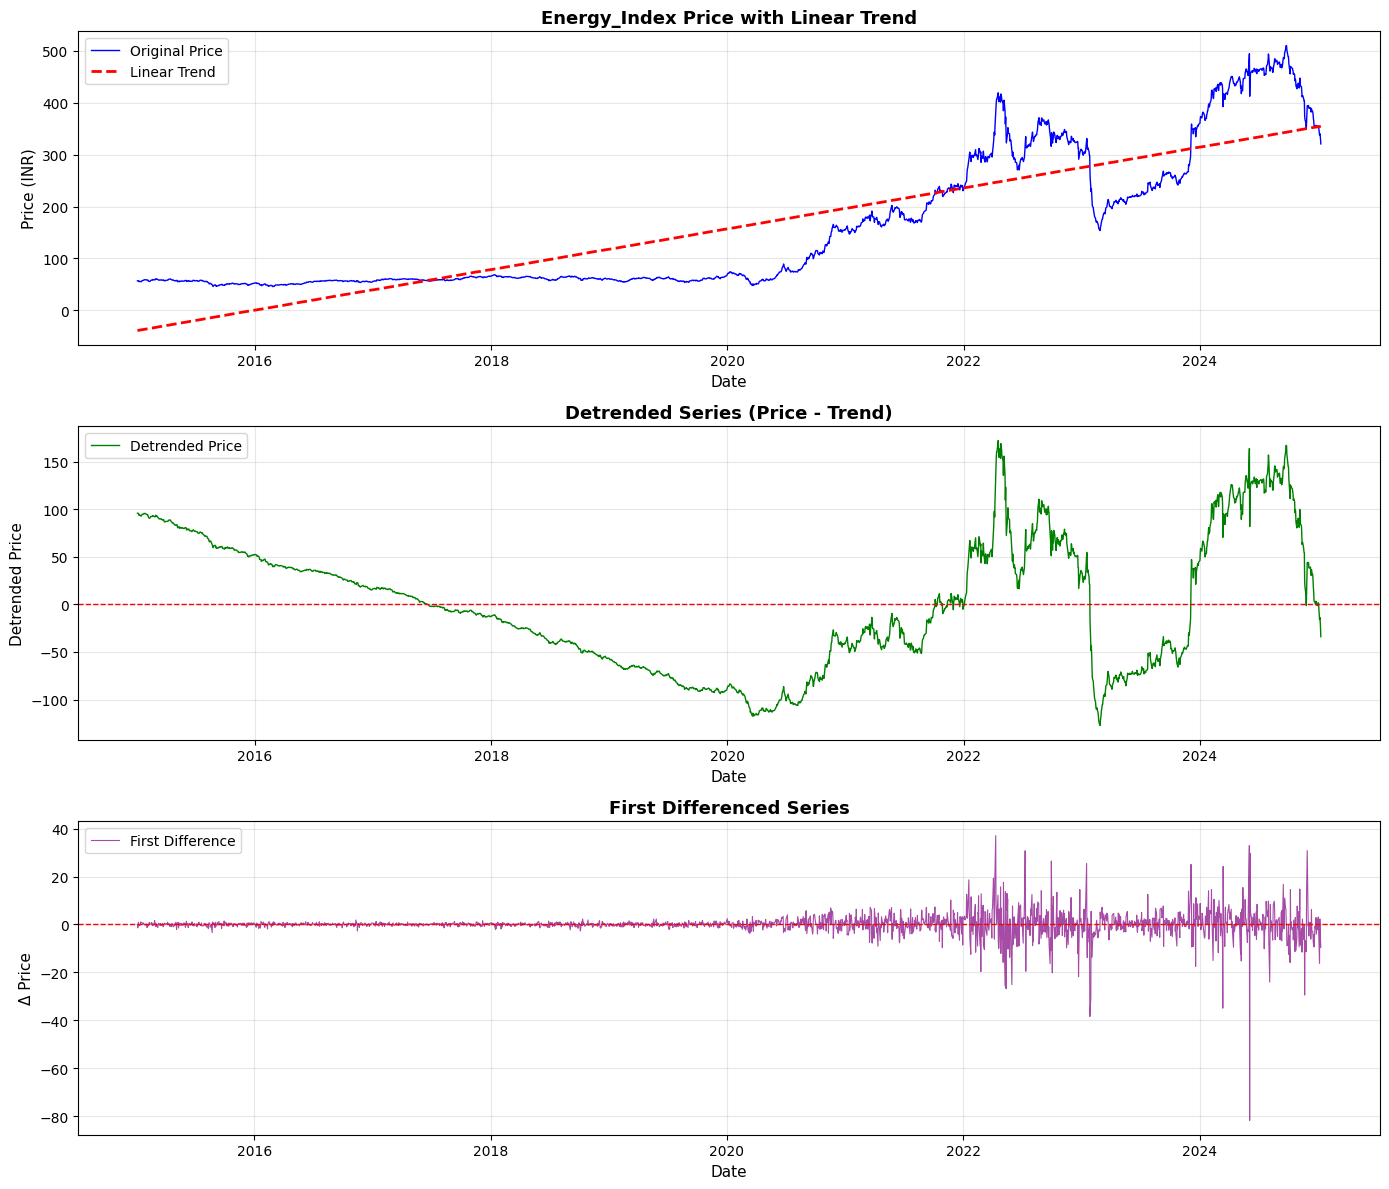


STATIONARITY TEST ON DETRENDED SERIES

ADF Test on Detrended Series:
  P-value: 0.190215
  Result: Still non-stationary ✗

ACF & PACF ANALYSIS

✓ Chart saved as: Price_ACF_PACF.png


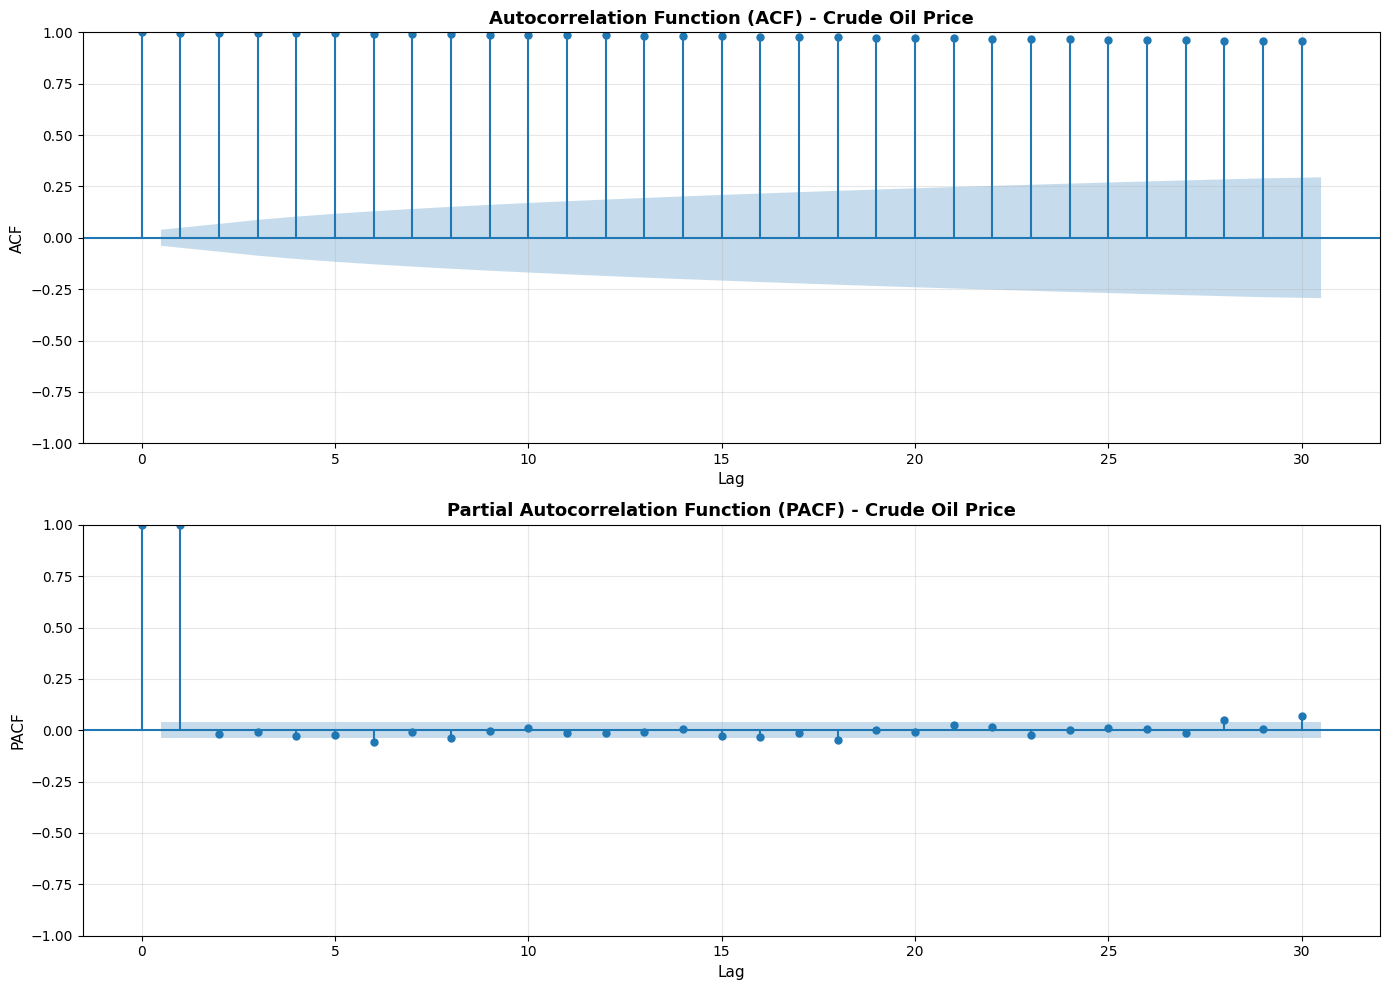


AR MODEL COMPARISON
AR(1): AIC = 14777.63, BIC = 14795.12
AR(2): AIC = 14779.62, BIC = 14802.95
AR(3): AIC = 14781.38, BIC = 14810.53
AR(4): AIC = 14779.88, BIC = 14814.87
AR(5): AIC = 14776.35, BIC = 14817.17

Best AR by AIC: AR(5)
Best AR by BIC: AR(1)

MA MODEL COMPARISON
MA(1): AIC = 28388.11, BIC = 28405.61
MA(2): AIC = 25560.22, BIC = 25583.55
MA(3): AIC = 23382.49, BIC = 23411.65
MA(4): AIC = 21861.04, BIC = 21896.03
MA(5): AIC = 22632.27, BIC = 22673.09

Best MA by AIC: MA(4)
Best MA by BIC: MA(4)

ARMA MODEL COMPARISON
ARMA(1,1): AIC = 14779.62, BIC = 14802.94
ARMA(1,2): AIC = 14781.40, BIC = 14810.56
ARMA(1,3): AIC = 14779.81, BIC = 14814.80
ARMA(2,1): AIC = 14778.09, BIC = 14807.25
ARMA(2,2): AIC = 14771.38, BIC = 14806.37
ARMA(2,3): AIC = 14763.91, BIC = 14804.73
ARMA(3,1): AIC = 14782.81, BIC = 14817.80
ARMA(3,2): AIC = 14771.54, BIC = 14812.36
ARMA(3,3): AIC = 14775.51, BIC = 14822.17

Best ARMA by AIC: ARMA(2,3)
Best ARMA by BIC: ARMA(1,1)

OVERALL BEST MODELS

Best Mod

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

# Load Data
df = pd.read_excel("Crude_Oil_Indian_Energy_Stocks_With_Index.xlsx",
                   sheet_name="Daily_Data_With_Index", index_col=0)
price = df["Energy_Index"].dropna()

print("="*80)
print("AR/MA MODEL SELECTION - CRUDE OIL PRICE")
print("="*80)
print(f"\nSample size: {len(price)} observations\n")

# Stationarity Tests
print("="*80)
print("STATIONARITY TESTS")
print("="*80)

# ADF Test
adf_result = adfuller(price, autolag='AIC')
print("\n1. Augmented Dickey-Fuller (ADF) Test:")
print("   H0: Series has unit root (non-stationary)")
print(f"   ADF Statistic: {adf_result[0]:.4f}")
print(f"   P-value: {adf_result[1]:.6f}")
print(f"   Result: {'Stationary ✓' if adf_result[1] < 0.05 else 'Non-stationary ✗'}")

# KPSS Test - Trend Stationarity
kpss_trend = kpss(price, regression='ct', nlags='auto')
print("\n2. KPSS Test (Trend Stationarity):")
print("   H0: Series is trend stationary")
print(f"   KPSS Statistic: {kpss_trend[0]:.4f}")
print(f"   P-value: {kpss_trend[1]:.6f}")
print(f"   Critical Values: 10%={kpss_trend[3]['10%']:.3f}, 5%={kpss_trend[3]['5%']:.3f}, 1%={kpss_trend[3]['1%']:.3f}")
print(f"   Result: {'Trend stationary ✓' if kpss_trend[1] > 0.05 else 'Not trend stationary ✗'}")

print(f"\n   Interpretation: {'Series is stationary around a trend' if kpss_trend[1] > 0.05 else 'Series has unit root - use differencing'}")
print()

# Trend Analysis
print("="*80)
print("TREND ANALYSIS")
print("="*80)

# Fit linear trend
from scipy import stats as sp_stats
x = np.arange(len(price))
slope, intercept, r_value, p_value_trend, std_err = sp_stats.linregress(x, price.values)
trend_line = slope * x + intercept

print(f"\nLinear Trend Test:")
print(f"  Slope: {slope:.6f}")
print(f"  R-squared: {r_value**2:.4f}")
print(f"  P-value: {p_value_trend:.6f}")
print(f"  Result: {'Significant trend ⚠' if p_value_trend < 0.05 else 'No significant trend ✓'}")
print(f"  Direction: {'Upward trend' if slope > 0 else 'Downward trend'}")

# Detrended series
detrended = price.values - trend_line

# Plot: Original vs Trend
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

axes[0].plot(price.index, price.values, label='Original Price', color='blue', linewidth=1)
axes[0].plot(price.index, trend_line, label='Linear Trend', color='red', linewidth=2, linestyle='--')
axes[0].set_title('Energy_Index Price with Linear Trend', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=11)
axes[0].set_ylabel('Price (INR)', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(price.index, detrended, label='Detrended Price', color='green', linewidth=1)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Detrended Series (Price - Trend)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_ylabel('Detrended Price', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# First difference (for comparison)
first_diff = price.diff().dropna()
axes[2].plot(first_diff.index, first_diff.values, label='First Difference', color='purple', linewidth=0.8, alpha=0.7)
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[2].set_title('First Differenced Series', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=11)
axes[2].set_ylabel('Δ Price', fontsize=11)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Trend_Analysis.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Chart saved as: Trend_Analysis.png")
plt.show()

print("\n" + "="*80)
print("STATIONARITY TEST ON DETRENDED SERIES")
print("="*80)

adf_detrend = adfuller(detrended, autolag='AIC')
print(f"\nADF Test on Detrended Series:")
print(f"  P-value: {adf_detrend[1]:.6f}")
print(f"  Result: {'Stationary ✓' if adf_detrend[1] < 0.05 else 'Still non-stationary ✗'}")

print()
# ACF and PACF Plot
print("="*80)
print("ACF & PACF ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

plot_acf(price, lags=30, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation Function (ACF) - Crude Oil Price', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Lag', fontsize=11)
axes[0].set_ylabel('ACF', fontsize=11)
axes[0].grid(True, alpha=0.3)

plot_pacf(price, lags=30, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF) - Crude Oil Price', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Lag', fontsize=11)
axes[1].set_ylabel('PACF', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Price_ACF_PACF.png', dpi=300, bbox_inches='tight')
print("\n✓ Chart saved as: Price_ACF_PACF.png")
plt.show()

print()

# Test AR Models
print("="*80)
print("AR MODEL COMPARISON")
print("="*80)

ar_results = []
for p in range(1, 6):
    model = ARIMA(price, order=(p, 0, 0))
    fitted = model.fit()
    ar_results.append({
        'Model': f'AR({p})',
        'AIC': fitted.aic,
        'BIC': fitted.bic
    })
    print(f"AR({p}): AIC = {fitted.aic:.2f}, BIC = {fitted.bic:.2f}")

best_ar_aic = min(ar_results, key=lambda x: x['AIC'])
best_ar_bic = min(ar_results, key=lambda x: x['BIC'])
print(f"\nBest AR by AIC: {best_ar_aic['Model']}")
print(f"Best AR by BIC: {best_ar_bic['Model']}")

# Test MA Models
print("\n" + "="*80)
print("MA MODEL COMPARISON")
print("="*80)

ma_results = []
for q in range(1, 6):
    model = ARIMA(price, order=(0, 0, q))
    fitted = model.fit()
    ma_results.append({
        'Model': f'MA({q})',
        'AIC': fitted.aic,
        'BIC': fitted.bic
    })
    print(f"MA({q}): AIC = {fitted.aic:.2f}, BIC = {fitted.bic:.2f}")

best_ma_aic = min(ma_results, key=lambda x: x['AIC'])
best_ma_bic = min(ma_results, key=lambda x: x['BIC'])
print(f"\nBest MA by AIC: {best_ma_aic['Model']}")
print(f"Best MA by BIC: {best_ma_bic['Model']}")

# Test ARMA Models
print("\n" + "="*80)
print("ARMA MODEL COMPARISON")
print("="*80)

arma_results = []
for p in range(1, 4):
    for q in range(1, 4):
        try:
            model = ARIMA(price, order=(p, 0, q))
            fitted = model.fit()
            arma_results.append({
                'Model': f'ARMA({p},{q})',
                'AIC': fitted.aic,
                'BIC': fitted.bic
            })
            print(f"ARMA({p},{q}): AIC = {fitted.aic:.2f}, BIC = {fitted.bic:.2f}")
        except:
            continue

best_arma_aic = min(arma_results, key=lambda x: x['AIC'])
best_arma_bic = min(arma_results, key=lambda x: x['BIC'])
print(f"\nBest ARMA by AIC: {best_arma_aic['Model']}")
print(f"Best ARMA by BIC: {best_arma_bic['Model']}")

# Summary
print("\n" + "="*80)
print("OVERALL BEST MODELS")
print("="*80)

all_models = ar_results + ma_results + arma_results
overall_best_aic = min(all_models, key=lambda x: x['AIC'])
overall_best_bic = min(all_models, key=lambda x: x['BIC'])

print(f"\nBest Model by AIC: {overall_best_aic['Model']} (AIC = {overall_best_aic['AIC']:.2f})")
print(f"Best Model by BIC: {overall_best_bic['Model']} (BIC = {overall_best_bic['BIC']:.2f})")

if adf_result[1] >= 0.05:
    print(f"\n⚠ WARNING: Price series is non-stationary!")
    print(f"   Recommendation: Use ARIMA with differencing (d=1)")

print("="*80)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA(1,1,0) WITH DRIFT FORECASTING

Linear Trend Slope (Drift): 0.156277

Last 30 Days Price:
Date
2024-11-27    363.565617
2024-11-29    394.378085
2024-12-02    393.625237
2024-12-03    394.562475
2024-12-04    389.713091
2024-12-05    389.014576
2024-12-06    389.719462
2024-12-09    390.476114
2024-12-10    384.346696
2024-12-11    382.059949
2024-12-12    388.227626
2024-12-13    385.723159
2024-12-16    382.805363
2024-12-17    377.439251
2024-12-18    369.591198
2024-12-19    365.376147
2024-12-20    356.008789
2024-12-23    355.145515
2024-12-24    353.624939
2024-12-26    356.510037
2024-12-27    352.465211
2024-12-30    354.548736
2024-12-31    352.312691
2025-01-02    355.453139
2025-01-03    354.424581
2025-01-06    338.187402
2025-01-07    340.506038
2025-01-08    336.849112
2025-01-09    330.308495
2025-01-10    320.751960
Name: Energy_Index, dtype: float64

10-Day Forecast with Drift:
              forecast  forecast_with_drift
2025-01-11  320.739564           320.89584

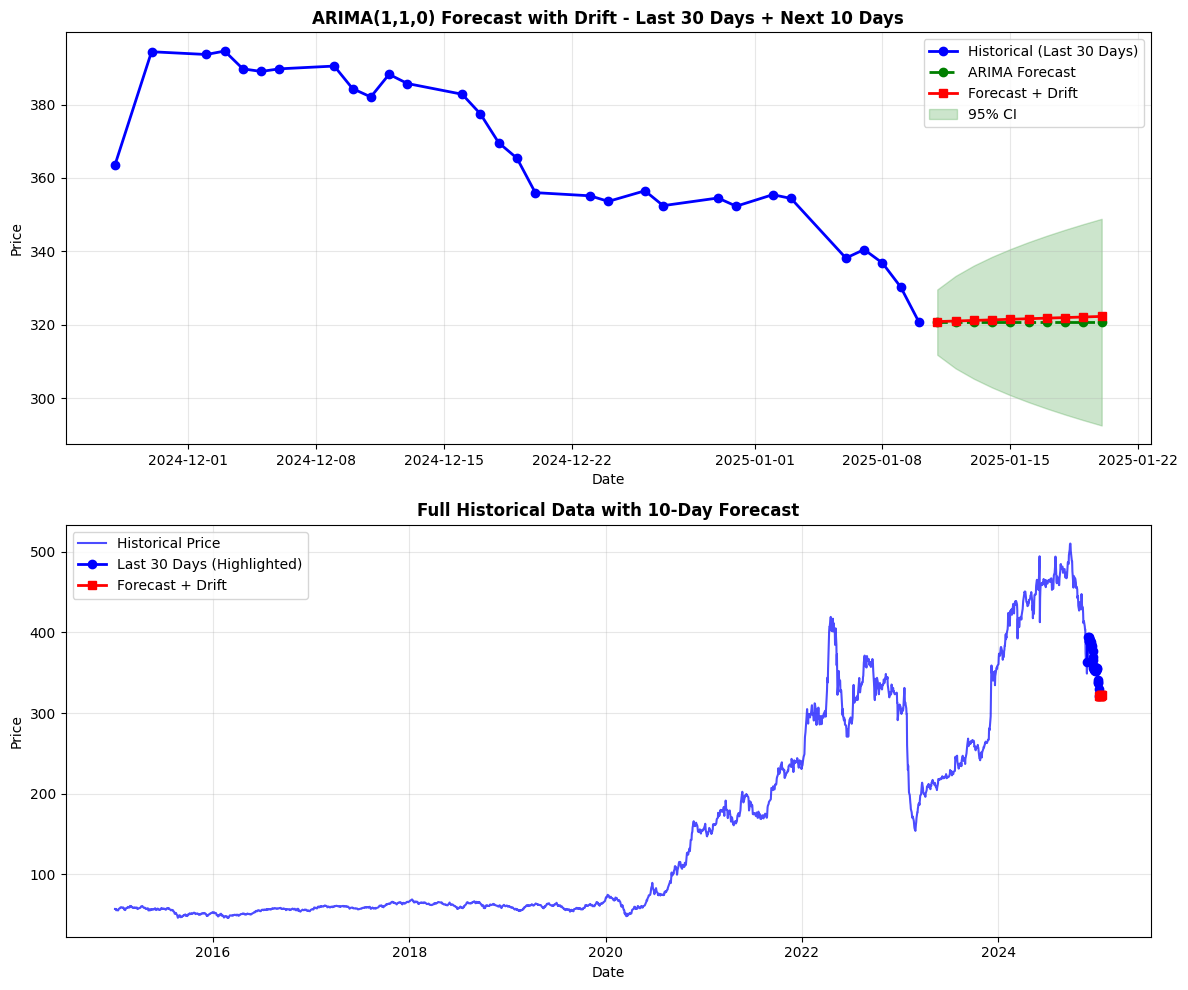


✓ Results exported to 'ARIMA_Forecast_Results.xlsx'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Load Data
df = pd.read_excel("/content/Crude_Oil_Indian_Energy_Stocks_With_Index .xlsx",
                   sheet_name="Daily_Data_With_Index", index_col=0)

prices = df["Energy_Index"].dropna()

# Parameters
drift_slope = 0.156277
arima_order = (1, 1, 0)
forecast_days = 10
lookback_days = 30

# Fit ARIMA model with drift
model = ARIMA(prices, order=arima_order)
fitted_model = model.fit()

# Get forecast
forecast = fitted_model.get_forecast(steps=forecast_days)
forecast_df = forecast.conf_int()
forecast_df['forecast'] = forecast.predicted_mean

# Add drift component to forecast
drift_adjustment = np.arange(1, forecast_days + 1) * drift_slope
forecast_df['forecast_with_drift'] = forecast_df['forecast'] + drift_adjustment

# Get last 30 days
last_30_days = prices.tail(lookback_days)

# Create forecast dates
last_date = prices.index[-1]
forecast_dates = pd.date_range(start=last_date + timedelta(days=1), periods=forecast_days, freq='D')
forecast_df.index = forecast_dates

# Print Results
print("="*70)
print("ARIMA(1,1,0) WITH DRIFT FORECASTING")
print("="*70)
print(f"\nLinear Trend Slope (Drift): {drift_slope}")
print(f"\nLast 30 Days Price:")
print(last_30_days)
print(f"\n{'='*70}")
print("10-Day Forecast with Drift:")
print("="*70)
print(forecast_df[['forecast', 'forecast_with_drift']])
print(f"\n{'='*70}")
print("Model Summary:")
print(fitted_model.summary())

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Last 30 days + Forecast
ax1 = axes[0]
ax1.plot(last_30_days.index, last_30_days.values, 'b-o', label='Historical (Last 30 Days)', linewidth=2)
ax1.plot(forecast_dates, forecast_df['forecast'].values, 'g--o', label='ARIMA Forecast', linewidth=2)
ax1.plot(forecast_dates, forecast_df['forecast_with_drift'].values, 'r-s', label='Forecast + Drift', linewidth=2)
ax1.fill_between(forecast_dates,
                  forecast_df.iloc[:, 0],
                  forecast_df.iloc[:, 1],
                  alpha=0.2, color='green', label='95% CI')
ax1.set_title('ARIMA(1,1,0) Forecast with Drift - Last 30 Days + Next 10 Days', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Full historical + Forecast
ax2 = axes[1]
ax2.plot(prices.index, prices.values, 'b-', label='Historical Price', linewidth=1.5, alpha=0.7)
ax2.plot(last_30_days.index, last_30_days.values, 'b-o', label='Last 30 Days (Highlighted)', linewidth=2)
ax2.plot(forecast_dates, forecast_df['forecast_with_drift'].values, 'r-s', label='Forecast + Drift', linewidth=2)
ax2.set_title('Full Historical Data with 10-Day Forecast', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Export results to Excel
output_df = pd.DataFrame({
    'Date': forecast_dates,
    'ARIMA_Forecast': forecast_df['forecast'].values,
    'Drift_Adjustment': drift_adjustment,
    'Forecast_with_Drift': forecast_df['forecast_with_drift'].values,
    'Lower_CI': forecast_df.iloc[:, 0].values,
    'Upper_CI': forecast_df.iloc[:, 1].values
})

output_df.to_excel('ARIMA_Forecast_Results.xlsx', index=False)
print("\n✓ Results exported to 'ARIMA_Forecast_Results.xlsx'")